# Comparitive Analysis of Machine Learning Algorithms using Stock Analysis and Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
'''
!pip install -q hvplot
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install -q yfinance
'''

'\n!pip install -q hvplot\n!pip install --upgrade pandas\n!pip install --upgrade pandas-datareader\n!pip install -q yfinance\n'

The tech stocks we'll use for this analysis

Apple     - AAPL

Amazon    - AMZN

Google    - GOOG

Meta      - META

Microsoft - MSFT

Netflix   - NFLX

In [3]:

stock_list = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NFLX']

'''
# creating an empty list
stock_list = []
  
# number of elements as input
n = int(input("Enter number of Stocks : "))
  
# iterating till the range
for i in range(0, n):
    ele = input()
  
    stock_list.append(ele) # adding the element
'''

print("List of Stocks: ",stock_list,"\n")


print(" - Enter Start Date for Stock Analysis and Prediction \n")

temp2=input("What is your Start Date? (in DD/MM/YYYY) ")  
start = datetime.strptime(temp2,"%d/%m/%Y").date()


print(" - Enter End Date for Stock Analysis and Prediction \n")
print("1. End Date as Today")
print("2. Enter End Date ")

usr_response = input("Enter your choice:")

if(usr_response == '1'):
    end = datetime.now()
elif(usr_response == '2'):
    temp=input("What is your end Date? (in DD/MM/YYYY) ")  
    end=datetime.strptime(temp,"%d/%m/%Y").date()
else:
    print("ERROR! Please Give Date in Valid Format!")



'''
usr_response = input("Do you want to end date as today? (Y/N)")

if(usr_response==('y' or 'y')):
    end = datetime.now()
elif(usr_response==('N' or 'n')):
    temp=input("What is your end Date? (in DD/MM/YYYY) ")  
    end=datetime.strptime(temp,"%d/%m/%Y").date()
else:
    print("ERROR! Please Give Date in Valid Format!")

temp2=input("What is your Start Date? (in DD/MM/YYYY) ")  
start = datetime.strptime(temp2,"%d/%m/%Y").date()

#start = datetime(end.year - 5, end.month, end.day)
'''
print
print("\n  -- Downloading Stock Data from Yahoo Finance -- \n")
for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

print("\n             -- DOWNLOAD COMPLETE -- \n")


List of Stocks:  ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NFLX'] 

 - Enter Start Date for Stock Analysis and Prediction 

What is your Start Date? (in DD/MM/YYYY) 01/08/2012
 - Enter End Date for Stock Analysis and Prediction 

1. End Date as Today
2. Enter End Date 
Enter your choice:2
What is your end Date? (in DD/MM/YYYY) 01/08/2022

  -- Downloading Stock Data from Yahoo Finance -- 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

             -- DOWNLOAD COMPLETE -- 



In [4]:
company_list = [AAPL, AMZN, GOOG, META, MSFT, NFLX]
company_name = ["APPLE", "AMAZON", "GOOGLE", "META", "MICROSOFT", "NETFLIX"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(-5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2012-07-31,21.543928,21.846430,21.525715,21.812857,18.624517,462327600,APPLE
2012-08-01,21.996786,22.014286,21.535713,21.671785,18.504066,384501600,APPLE
2012-08-02,21.530001,21.810356,21.437500,21.706785,18.533943,332158400,APPLE
2012-08-03,21.915358,22.070715,21.841429,21.989286,18.775156,344920800,APPLE
2012-08-06,22.046070,22.316786,21.973572,22.233929,18.984032,302103200,APPLE
...,...,...,...,...,...,...,...
2022-07-18,192.500000,199.669998,189.800003,190.919998,190.919998,16322800,NETFLIX
2022-07-19,193.020004,201.970001,188.399994,201.630005,201.630005,28178700,NETFLIX
2022-07-20,208.169998,216.970001,200.100006,216.440002,216.440002,53920300,NETFLIX


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2012-07-31 to 2022-07-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   float64
 4   Adj Close     2516 non-null   float64
 5   Volume        2516 non-null   int64  
 6   company_name  2516 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 157.2+ KB


In [6]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,56.960310,57.590424,56.349838,56.995925,55.183433,1.898842e+08
std,45.586825,46.179146,45.016030,45.628141,46.184434,1.484855e+08
min,13.856071,14.271429,13.753571,13.947500,12.084600,4.100000e+07
25%,25.006965,25.246250,24.806251,25.084375,22.813592,9.628650e+07
50%,38.403751,38.565001,38.013750,38.331249,36.373869,1.375348e+08
75%,69.382504,70.438749,69.213125,69.698748,68.517210,2.273369e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,1.460852e+09


In [7]:
AAPL.isna().apply(pd.value_counts)

,Open,High,Low,Close,Adj Close,Volume,company_name
False,2516,2516,2516,2516,2516,2516,2516


In [8]:
AAPL_date = list(AAPL.index.values)
AMZN_date = list(AMZN.index.values)
GOOG_date = list(GOOG.index.values)
META_date = list(META.index.values)
MSFT_date = list(MSFT.index.values)
NFLX_date = list(NFLX.index.values)

AAPL_date

[numpy.datetime64('2012-07-31T00:00:00.000000000'),
 numpy.datetime64('2012-08-01T00:00:00.000000000'),
 numpy.datetime64('2012-08-02T00:00:00.000000000'),
 numpy.datetime64('2012-08-03T00:00:00.000000000'),
 numpy.datetime64('2012-08-06T00:00:00.000000000'),
 numpy.datetime64('2012-08-07T00:00:00.000000000'),
 numpy.datetime64('2012-08-08T00:00:00.000000000'),
 numpy.datetime64('2012-08-09T00:00:00.000000000'),
 numpy.datetime64('2012-08-10T00:00:00.000000000'),
 numpy.datetime64('2012-08-13T00:00:00.000000000'),
 numpy.datetime64('2012-08-14T00:00:00.000000000'),
 numpy.datetime64('2012-08-15T00:00:00.000000000'),
 numpy.datetime64('2012-08-16T00:00:00.000000000'),
 numpy.datetime64('2012-08-17T00:00:00.000000000'),
 numpy.datetime64('2012-08-20T00:00:00.000000000'),
 numpy.datetime64('2012-08-21T00:00:00.000000000'),
 numpy.datetime64('2012-08-22T00:00:00.000000000'),
 numpy.datetime64('2012-08-23T00:00:00.000000000'),
 numpy.datetime64('2012-08-24T00:00:00.000000000'),
 numpy.datet

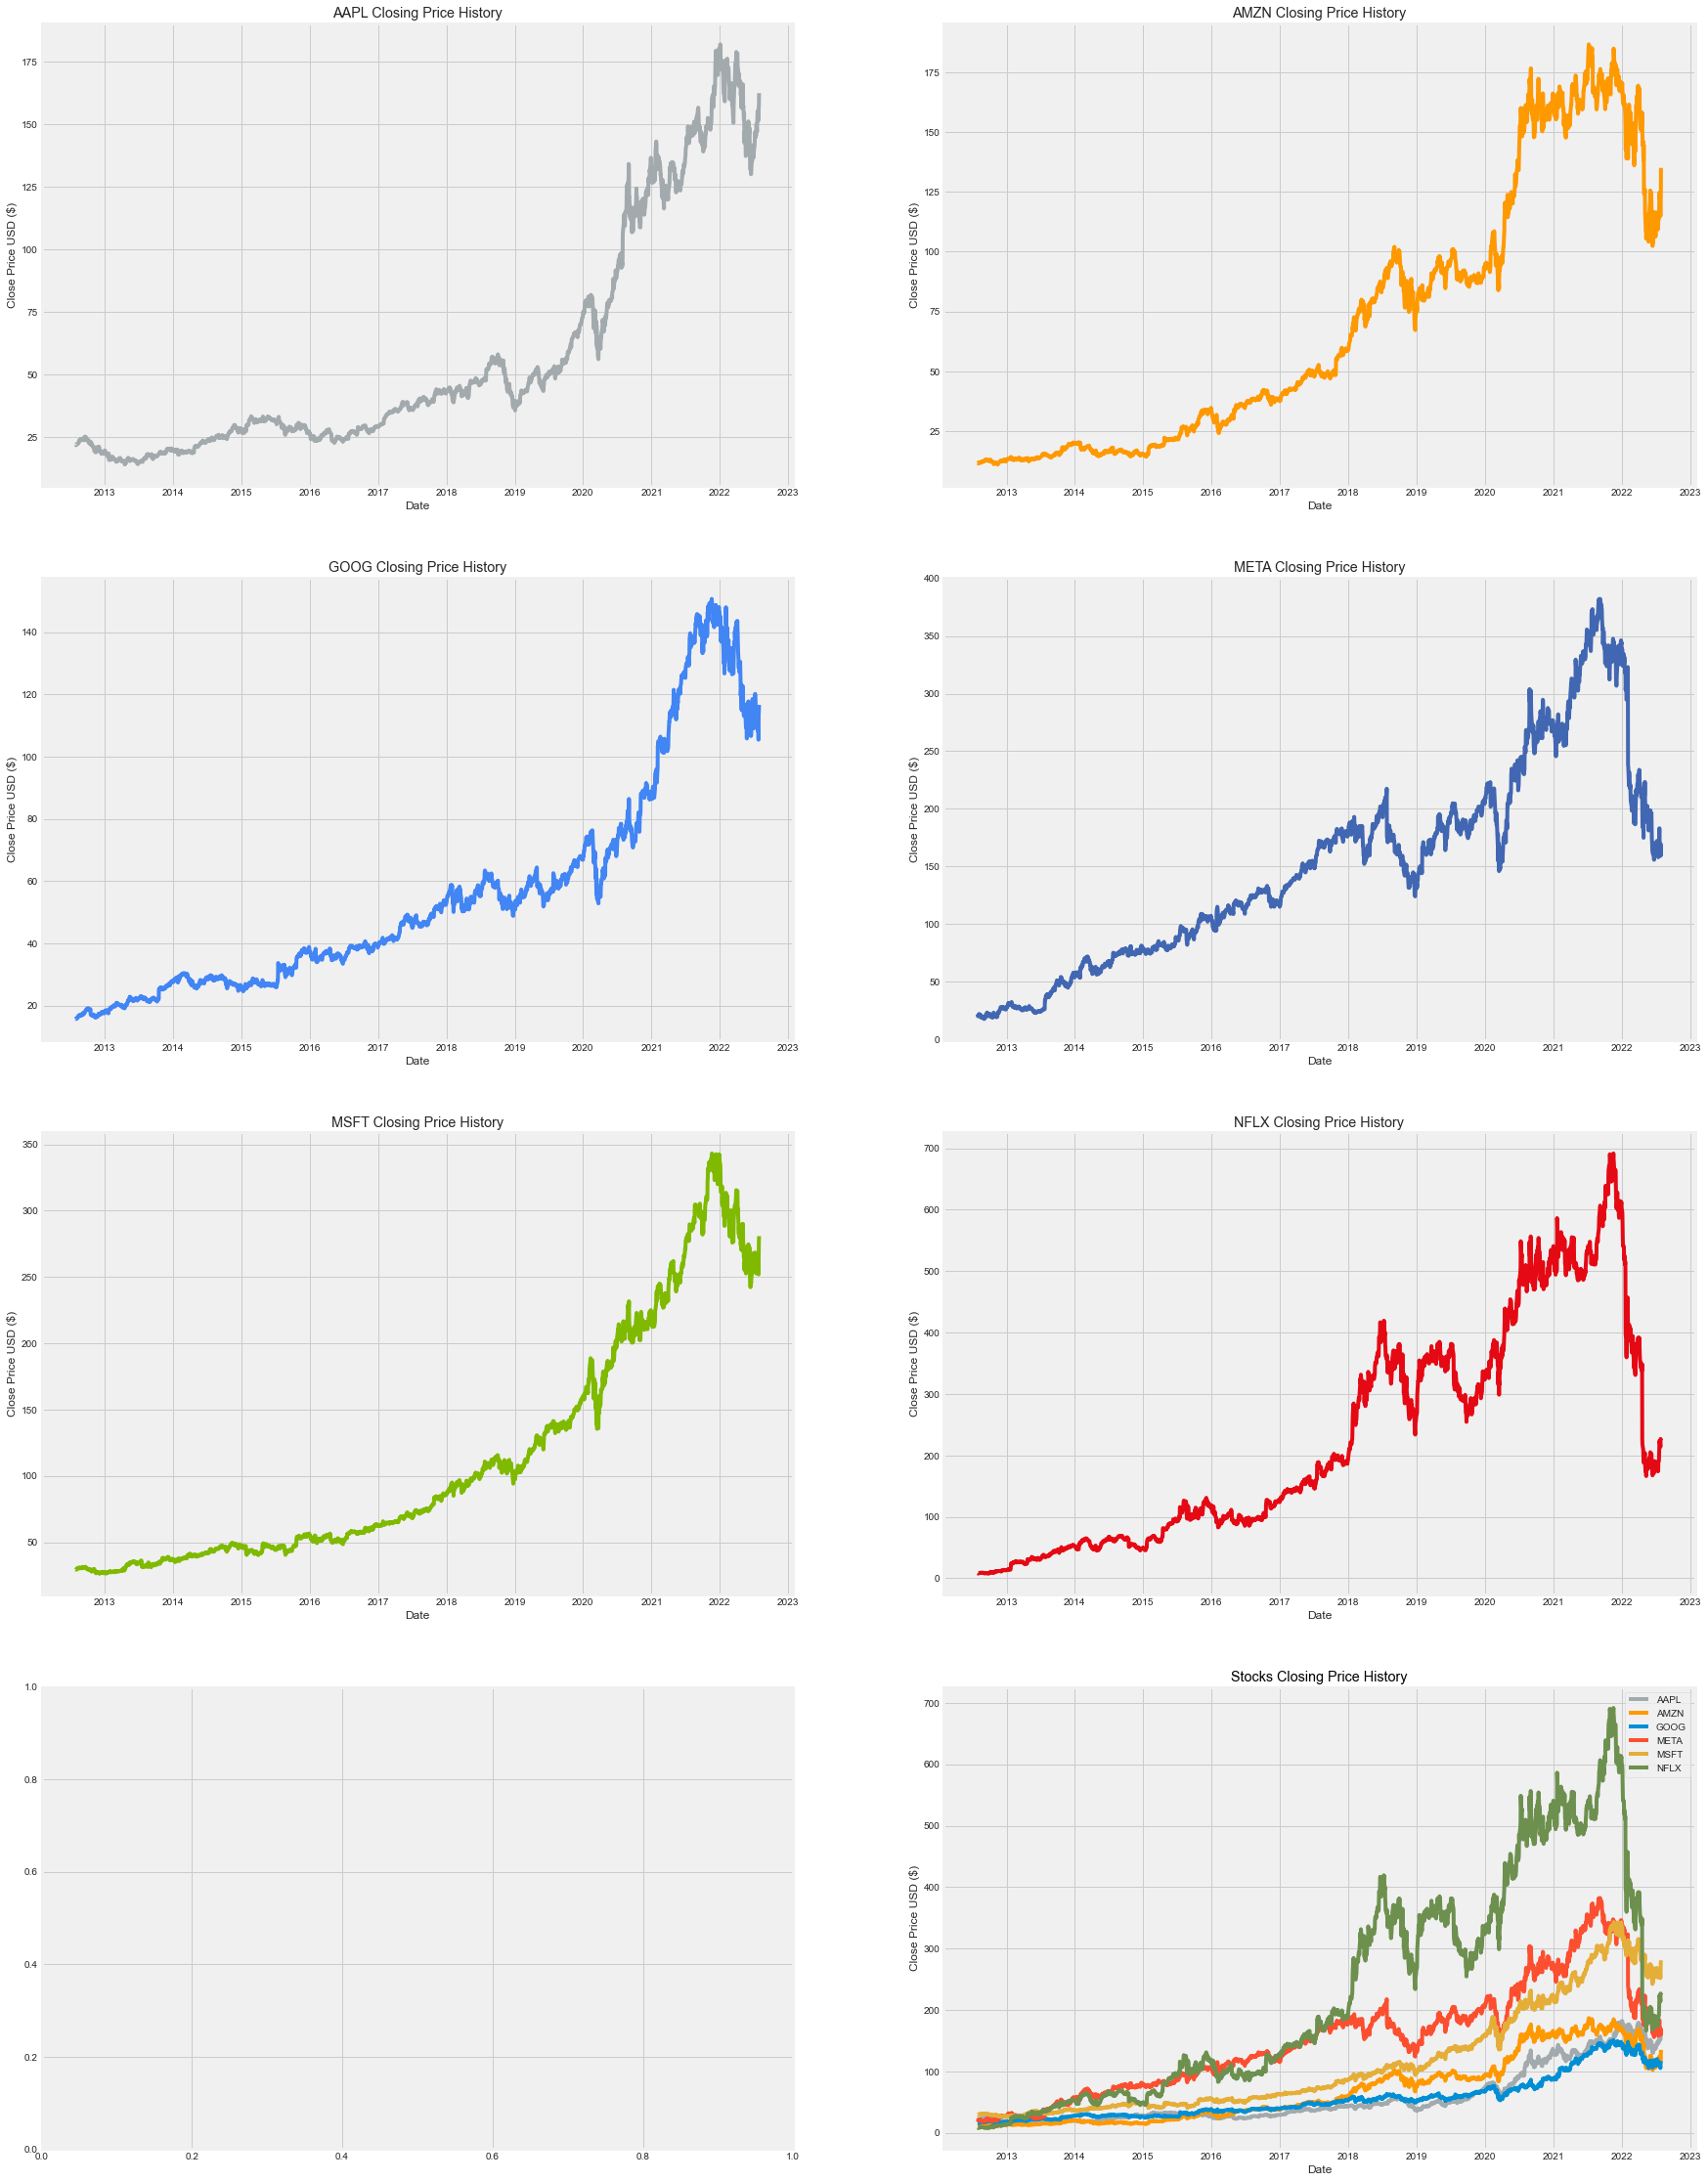

In [9]:
figure, axis = plt.subplots(4, 2, figsize=(27, 40))

axis[0, 0].plot(AAPL['Close'],label="AAPL",color='#A2AAAD')
axis[0, 0].set_xlabel('Date', fontsize=12)
axis[0, 0].set_ylabel('Close Price USD ($)',fontsize=12)
axis[0, 0].set_title("AAPL Closing Price History")

axis[0, 1].plot(AMZN['Close'],label="AMZN",color='#FF9900')
axis[0, 1].set_xlabel('Date', fontsize=12)
axis[0, 1].set_ylabel('Close Price USD ($)',fontsize=12)
axis[0, 1].set_title("AMZN Closing Price History")

axis[1, 0].plot(GOOG['Close'],label="GOOG",color='#4285F4')
axis[1, 0].set_xlabel('Date', fontsize=12)
axis[1, 0].set_ylabel('Close Price USD ($)',fontsize=12)
axis[1, 0].set_title("GOOG Closing Price History")

axis[1, 1].plot(META['Close'],label="META",color='#4267B2')
axis[1, 1].set_xlabel('Date', fontsize=12)
axis[1, 1].set_ylabel('Close Price USD ($)',fontsize=12)
axis[1, 1].set_title("META Closing Price History")

axis[2, 0].plot(MSFT['Close'],label="MSFT",color='#7FBA00')
axis[2, 0].set_xlabel('Date', fontsize=12)
axis[2, 0].set_ylabel('Close Price USD ($)',fontsize=12)
axis[2, 0].set_title("MSFT Closing Price History")

axis[2, 1].plot(NFLX['Close'],label="NFLX",color='#E50914')
axis[2, 1].set_xlabel('Date', fontsize=12)
axis[2, 1].set_ylabel('Close Price USD ($)',fontsize=12)
axis[2, 1].set_title("NFLX Closing Price History")



plt.title('AAPL Closing Price History')
plt.plot(AAPL['Close'],label="AAPL",color='#A2AAAD')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)',fontsize=12)

plt.title('AMZN Closing Price History')
plt.plot(AMZN['Close'],label="AMZN",color='#FF9900')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)',fontsize=12)

plt.title('GOOG Closing Price History',color='#4285F4')
plt.plot(GOOG['Close'],label="GOOG")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)',fontsize=12)

plt.title('META Closing Price History',color='#4267B2')
plt.plot(META['Close'],label="META")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)',fontsize=12)

plt.title('MSFT Closing Price History',color='#7FBA00')
plt.plot(MSFT['Close'],label="MSFT")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)',fontsize=12)

plt.title('NFLX Closing Price History',color='#E50914')
plt.plot(NFLX['Close'],label="NFLX")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)',fontsize=12)


plt.title('Stocks Closing Price History',color='#000000')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)',fontsize=12)


plt.legend()
plt.show()

# Stock Analysis
## 1. What was the change in price of the stock overtime?

Let's see a historical view of the closing price

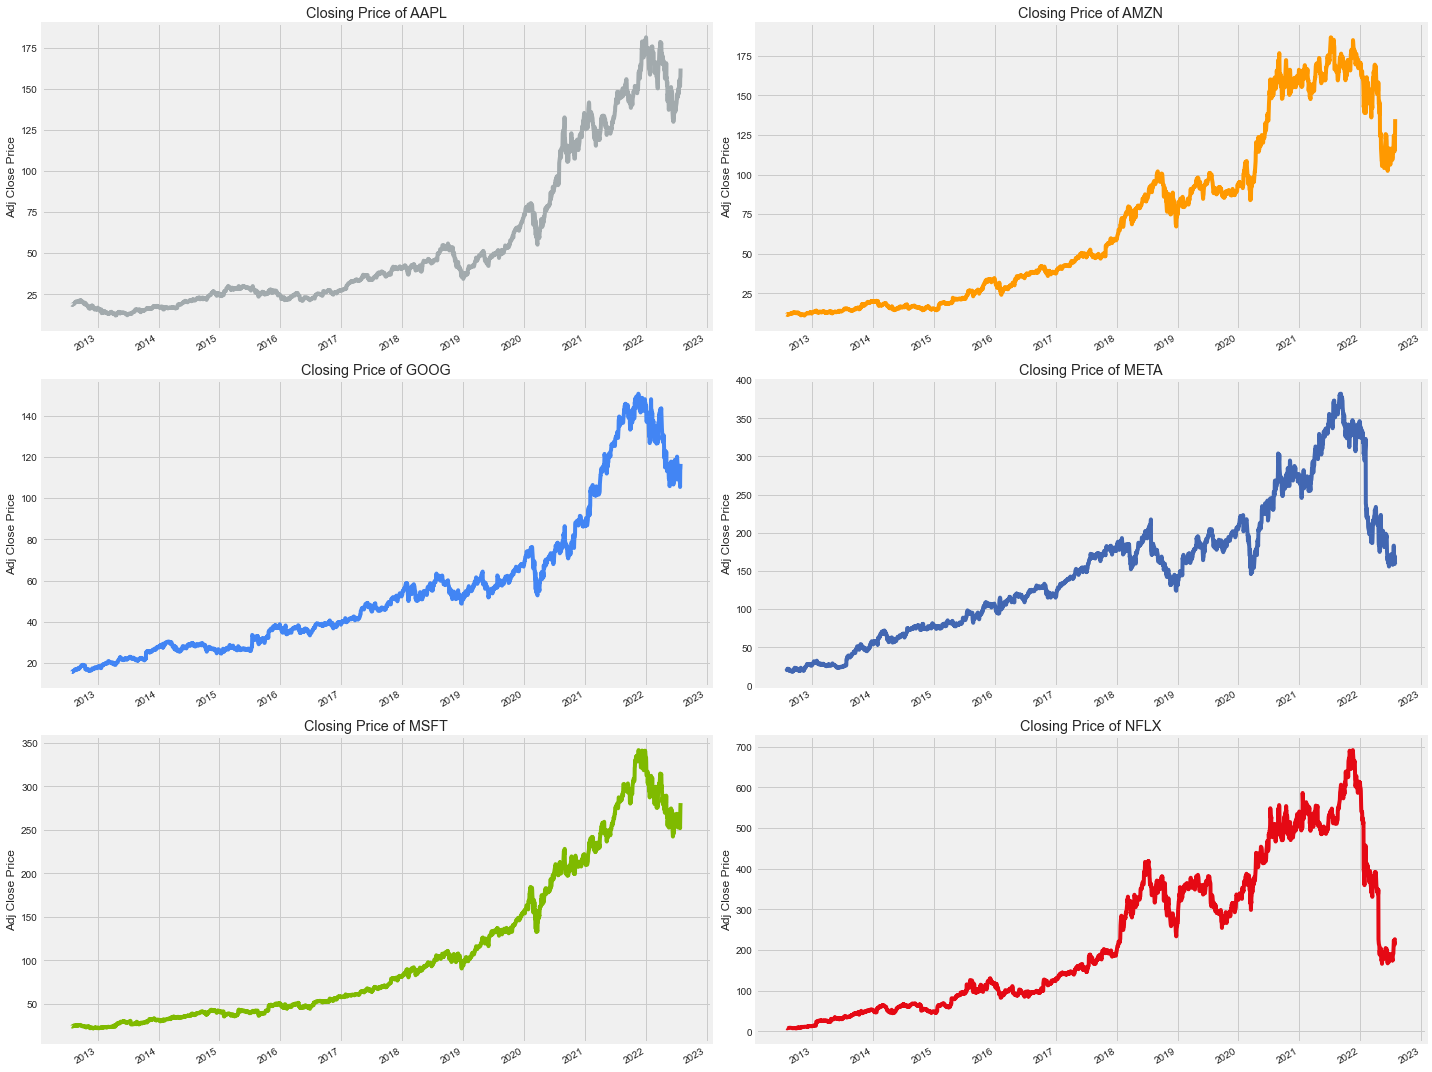

In [10]:
comp_shade=['#A2AAAD','#FF9900','#4285F4','#4267B2','#7FBA00','#E50914']
plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot(color=comp_shade[i-1])
    plt.ylabel('Adj Close Price')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i - 1]}")
    
plt.tight_layout()

Now let's plot the total volume of stock being traded each day

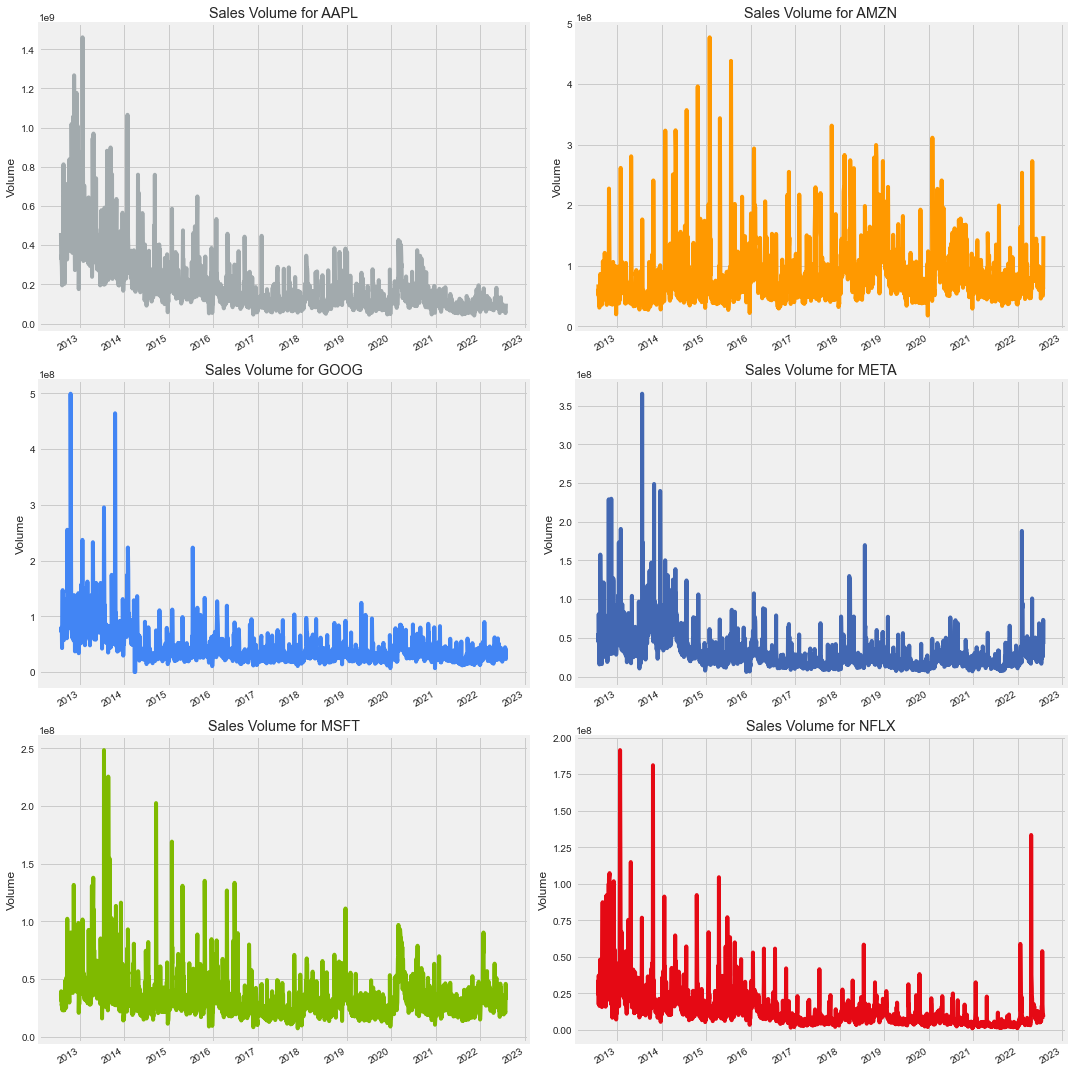

In [11]:
comp_shade=['#A2AAAD','#FF9900','#4285F4','#4267B2','#7FBA00','#E50914']
plt.figure(figsize=(15, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot(color=comp_shade[i-1])
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")

plt.tight_layout()

**Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.**

# Stock Analysis
## 2. What was the moving average of the various stocks?

In [12]:
movingavg_days = [10, 20, 50]

for movavg in movingavg_days:
    for company in company_list:
        column_name = f"MA for {movavg} days"
        company[column_name] = company['Close'].rolling(movavg).mean()

In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2012-07-31 to 2022-07-29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            2516 non-null   float64
 1   High            2516 non-null   float64
 2   Low             2516 non-null   float64
 3   Close           2516 non-null   float64
 4   Adj Close       2516 non-null   float64
 5   Volume          2516 non-null   int64  
 6   company_name    2516 non-null   object 
 7   MA for 10 days  2507 non-null   float64
 8   MA for 20 days  2497 non-null   float64
 9   MA for 50 days  2467 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 216.2+ KB


**Now let's go ahead and plot all the additional Moving Averages.**

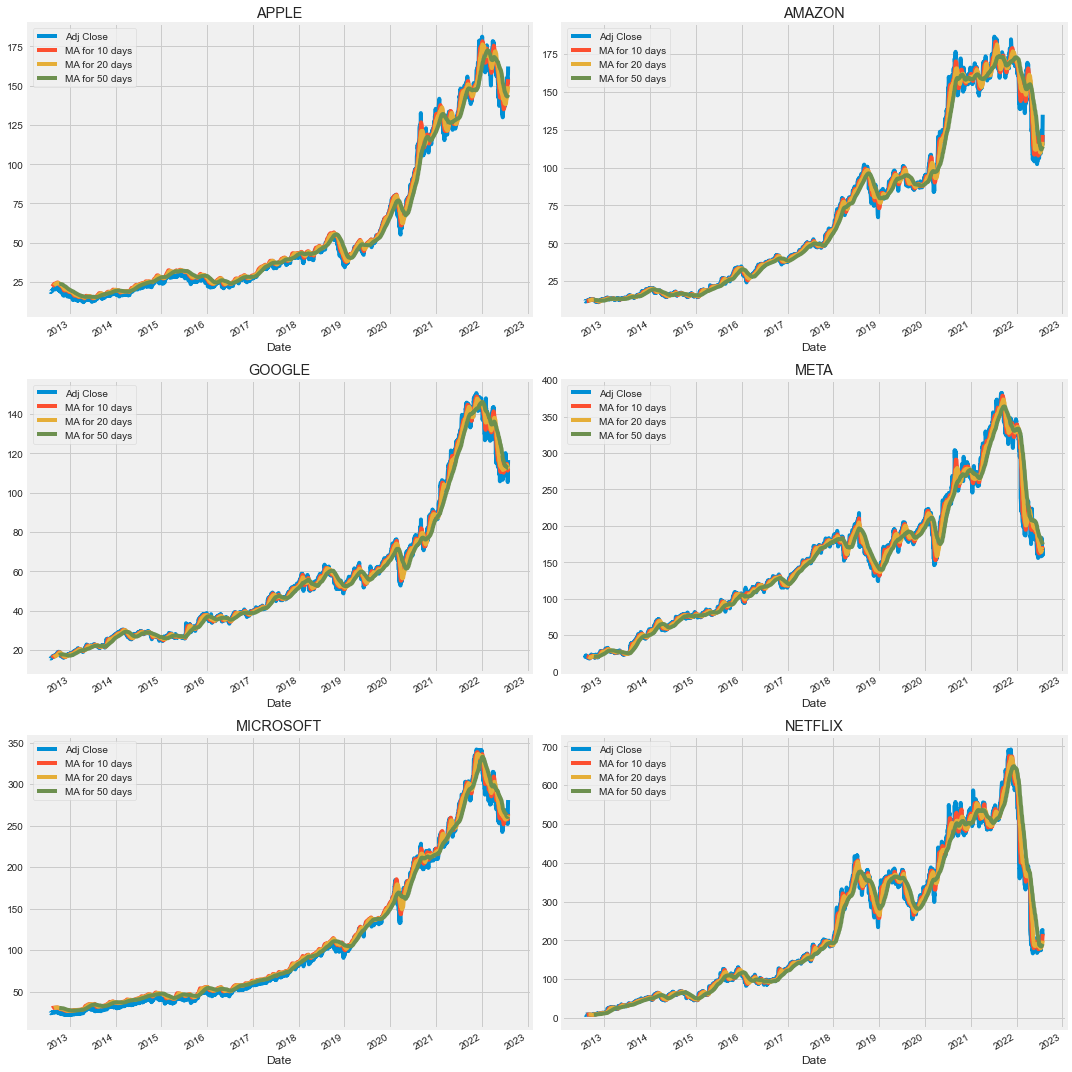

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('AMAZON')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GOOGLE')

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('META')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('MICROSOFT')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('NETFLIX')


fig.tight_layout()

# Stock Analysis
## 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

We'll use pct_change to find the percent change for each day


In [15]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

Then we'll plot the daily return percentage

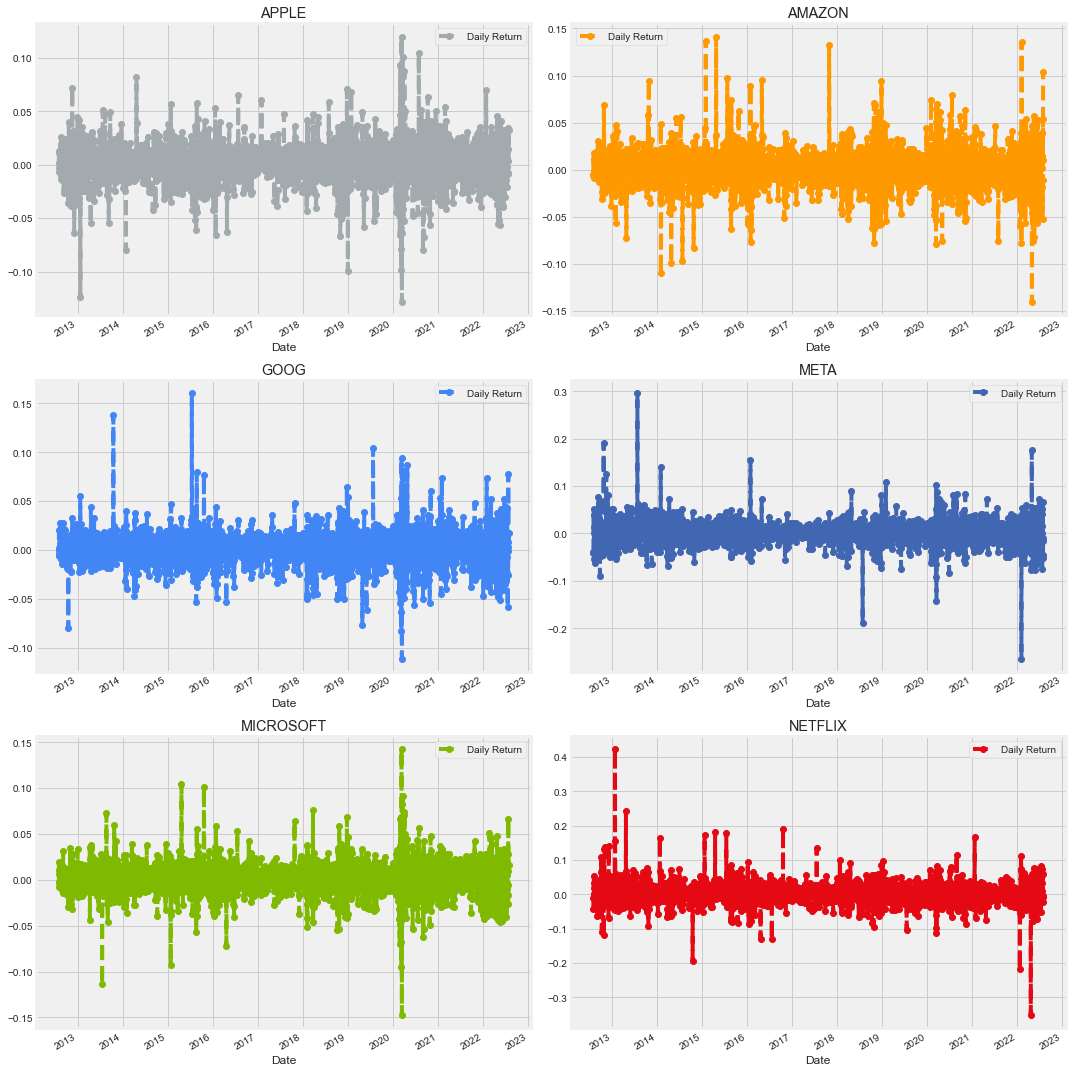

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o',color='#A2AAAD')
axes[0,0].set_title('APPLE')

AMZN['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o',color='#FF9900')
axes[0,1].set_title('AMAZON')

GOOG['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o',color='#4285F4')
axes[1,0].set_title('GOOG')

META['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o',color='#4267B2')
axes[1,1].set_title('META')

MSFT['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o',color='#7FBA00')
axes[2,0].set_title('MICROSOFT')

NFLX['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o',color='#E50914')
axes[2,1].set_title('NETFLIX')


fig.tight_layout()

**Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.**

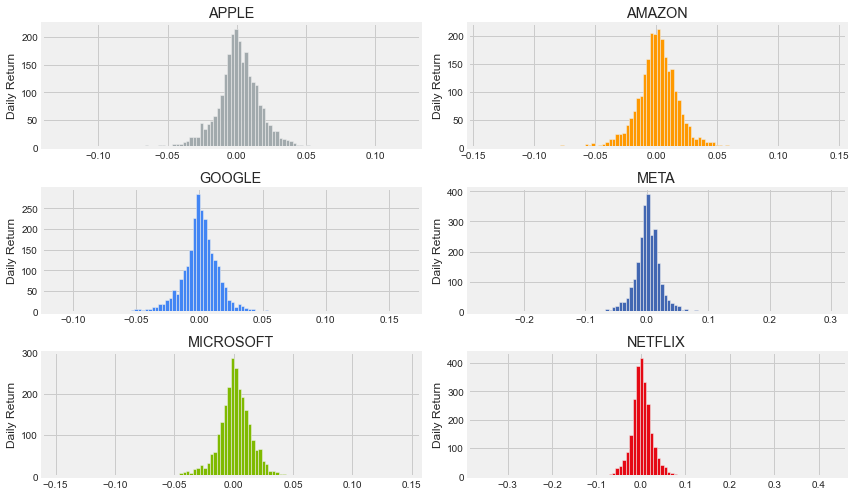

In [17]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=100,color=comp_shade[i-1])
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()


# Stock Analysis
## 4. What was the correlation between different stocks closing prices?

**Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.**

Grab all the closing prices for the tech stock list into one DataFrame

In [18]:
closing_df = DataReader(stock_list, 'yahoo', start, end)['Close']
closing_df.head(-5)

Symbols,AAPL,AMZN,GOOG,META,MSFT,NFLX
Date,,,,,,
2012-07-31,21.812857,11.665000,15.765158,21.709999,29.469999,8.121429
2012-08-01,21.671785,11.604500,15.757935,20.879999,29.410000,7.785714
2012-08-02,21.706785,11.540500,15.660052,20.040001,29.190001,7.695714
2012-08-03,21.989286,11.748500,15.973378,21.090000,29.750000,7.701429
2012-08-06,22.233929,11.699500,16.010489,21.920000,29.950001,8.112857
...,...,...,...,...,...,...
2022-07-19,151.000000,118.209999,114.620003,175.779999,259.529999,201.630005
2022-07-20,153.039993,122.769997,114.699997,183.089996,262.269989,216.440002
2022-07-21,155.350006,124.629997,115.040001,183.169998,264.839996,223.880005


**Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.**



 Make a new 'stock returns' DataFrame

In [19]:
stock_rets = closing_df.pct_change()
stock_rets.head()

Symbols,AAPL,AMZN,GOOG,META,MSFT,NFLX
Date,,,,,,
2012-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-01,-0.006467,-0.005186,-0.000458,-0.038231,-0.002036,-0.041337
2012-08-02,0.001615,-0.005515,-0.006212,-0.040230,-0.007480,-0.011560
2012-08-03,0.013014,0.018023,0.020008,0.052395,0.019185,0.000743
2012-08-06,0.011126,-0.004171,0.002323,0.039355,0.006723,0.053422


**Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.**

Comparing Apple Stock to itself should show a perfectly linear relationship


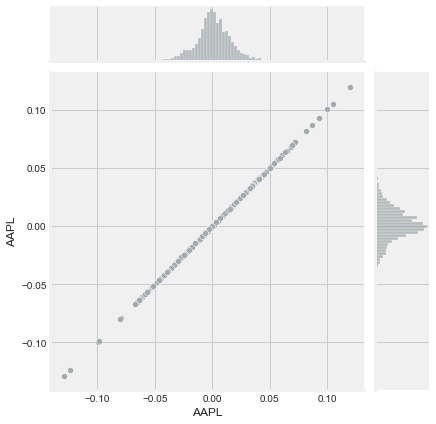

In [20]:
sns.jointplot(x='AAPL', y='AAPL', data=stock_rets, kind='scatter', color=comp_shade[0])

We'll use joinplot to compare the daily returns of Google and Microsoft

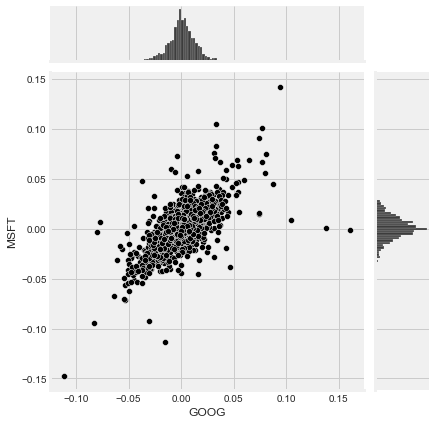

In [21]:
sns.jointplot(x='GOOG', y='MSFT', data=stock_rets, kind='scatter', color='black')

**So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.**

**Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot.**

We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

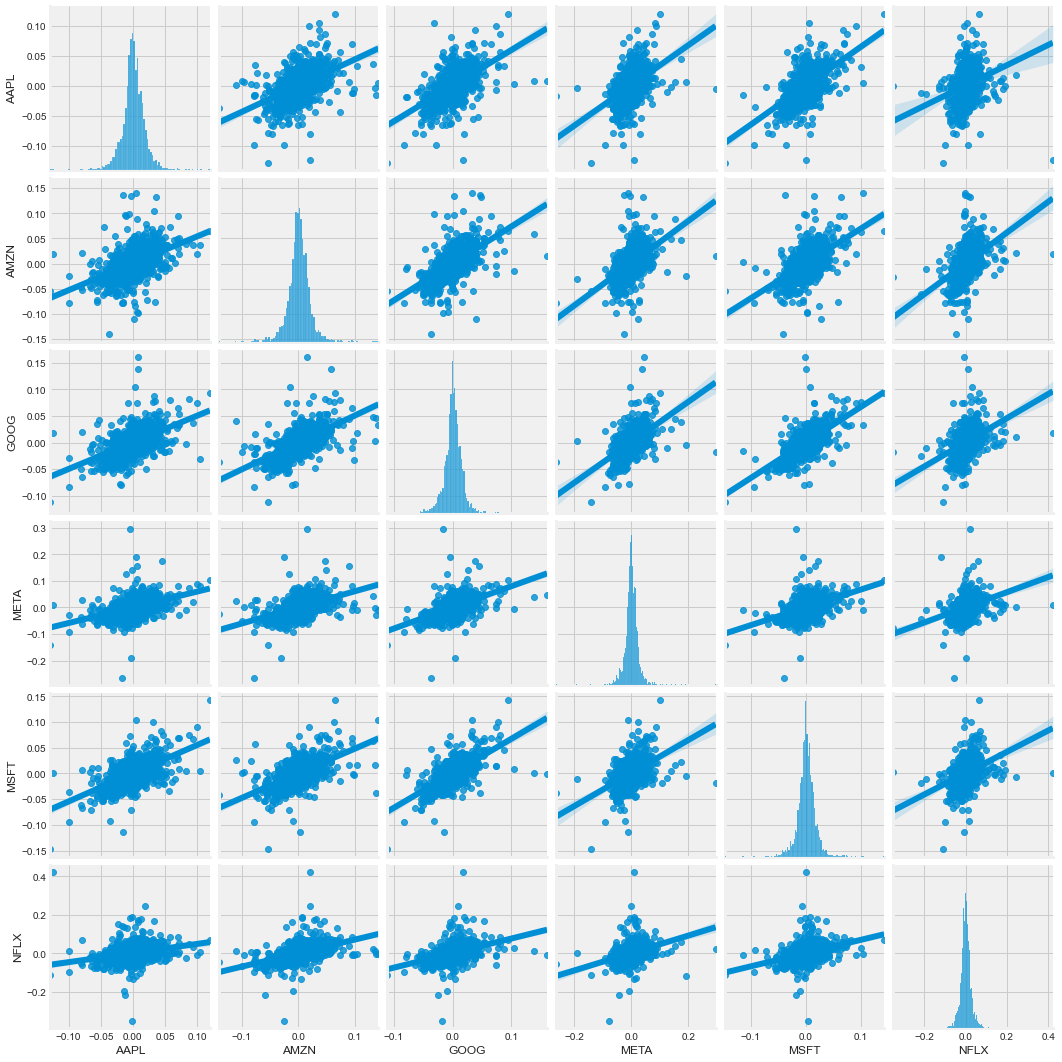

In [22]:
sns.pairplot(stock_rets, kind='reg')

**Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.**

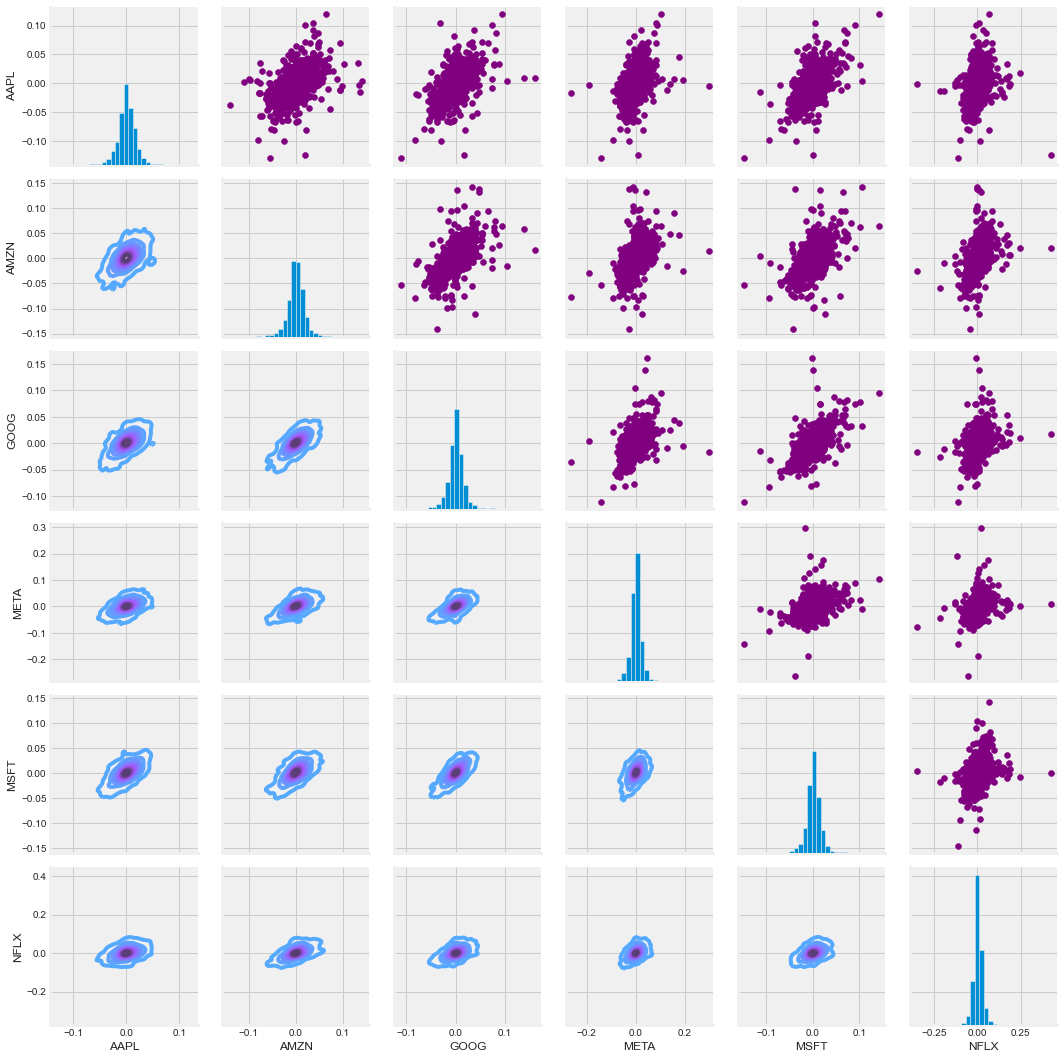

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

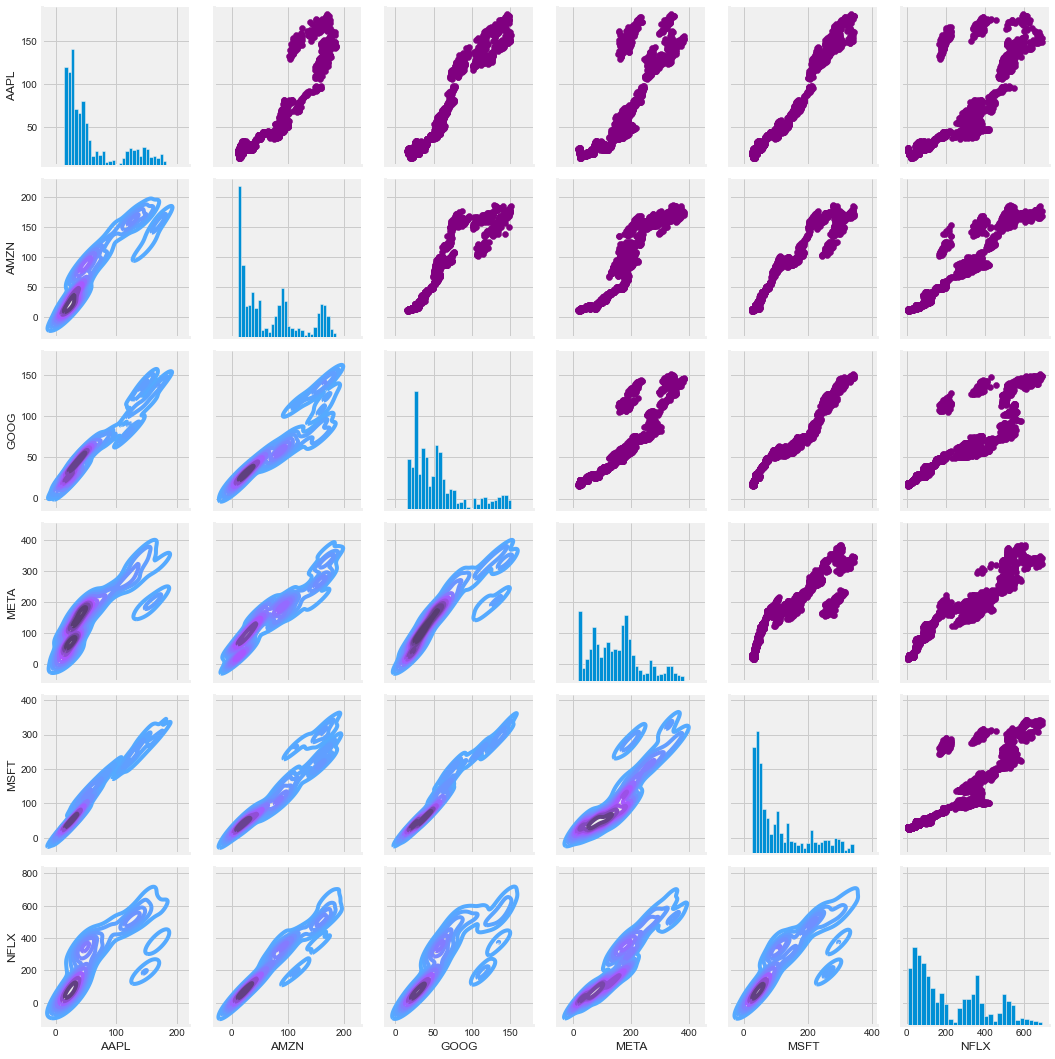

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

**Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.**

Let's go ahead and use sebron for a quick correlation plot for the daily returns.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

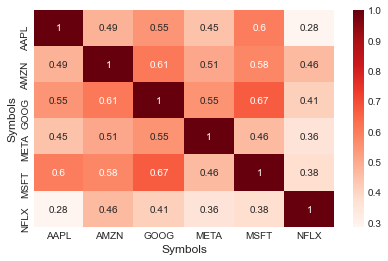

In [22]:
sns.heatmap(stock_rets.corr(), annot=True, cmap='Reds')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

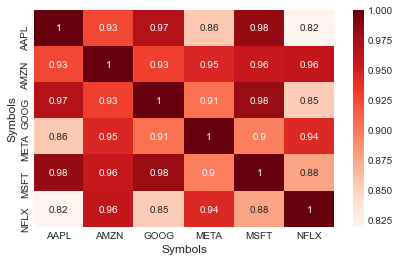

In [23]:
sns.heatmap(closing_df.corr(), annot=True, cmap='Reds')

**Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.**

# Stock Analysis
## 5. How much value do we put at risk by investing in a particular stock?

**There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.**

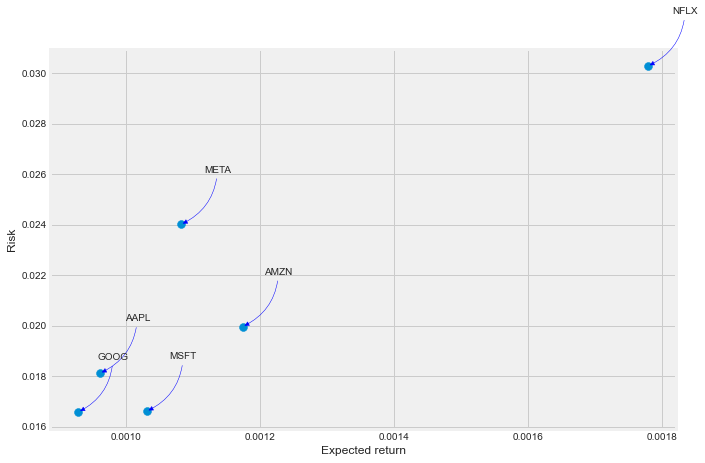

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal stock_rets DataFrame
returns = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-|>', color='blue', connectionstyle='arc3,rad=-0.3'))

In [25]:
AAPL.drop(AAPL.columns[[6, 7, 8, 9, 10]], axis=1, inplace=True)
AMZN.drop(AMZN.columns[[6, 7, 8, 9, 10]], axis=1, inplace=True)
GOOG.drop(GOOG.columns[[6, 7, 8, 9, 10]], axis=1, inplace=True)
META.drop(META.columns[[6, 7, 8, 9, 10]], axis=1, inplace=True)
MSFT.drop(MSFT.columns[[6, 7, 8, 9, 10]], axis=1, inplace=True)
NFLX.drop(NFLX.columns[[6, 7, 8, 9, 10]], axis=1, inplace=True)

In [26]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-31,21.543928,21.846430,21.525715,21.812857,18.624517,462327600
2012-08-01,21.996786,22.014286,21.535713,21.671785,18.504066,384501600
2012-08-02,21.530001,21.810356,21.437500,21.706785,18.533943,332158400
2012-08-03,21.915358,22.070715,21.841429,21.989286,18.775156,344920800
2012-08-06,22.046070,22.316786,21.973572,22.233929,18.984032,302103200
...,...,...,...,...,...,...
2022-07-25,154.009995,155.039993,152.279999,152.949997,152.737839,53623900
2022-07-26,152.259995,153.089996,150.800003,151.600006,151.389725,55138700
2022-07-27,152.580002,157.330002,152.160004,156.789993,156.572510,78620700


# Stock Prediction
## 1. Predicting the closing price stock price of Stocks using Regression

### -> **Feature Engineering**

In [27]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2012-07-31 to 2022-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


**Stock High minus Low price (H-L)**

In [28]:
AAPL["H-L"] = (AAPL["High"]-AAPL["Low"])
AMZN["H-L"] = (AMZN["High"]-AMZN["Low"])
GOOG["H-L"] = (GOOG["High"]-GOOG["Low"])
META["H-L"] = (META["High"]-META["Low"])
MSFT["H-L"] = (MSFT["High"]-MSFT["Low"])
NFLX["H-L"] = (NFLX["High"]-NFLX["Low"])

AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,H-L
Date,,,,,,,
2012-07-31,21.543928,21.846430,21.525715,21.812857,18.624517,462327600,0.320715
2012-08-01,21.996786,22.014286,21.535713,21.671785,18.504066,384501600,0.478573
2012-08-02,21.530001,21.810356,21.437500,21.706785,18.533943,332158400,0.372856
2012-08-03,21.915358,22.070715,21.841429,21.989286,18.775156,344920800,0.229286
2012-08-06,22.046070,22.316786,21.973572,22.233929,18.984032,302103200,0.343214


**Stock Close minus Open price (O-C)**

In [29]:
AAPL["O-C"] = (AAPL["Open"]-AAPL["Close"])
AMZN["O-C"] = (AMZN["Open"]-AMZN["Close"])
GOOG["O-C"] = (GOOG["Open"]-GOOG["Close"])
META["O-C"] = (META["Open"]-META["Close"])
MSFT["O-C"] = (MSFT["Open"]-MSFT["Close"])
NFLX["O-C"] = (NFLX["Open"]-NFLX["Close"])

AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C
Date,,,,,,,,
2012-07-31,21.543928,21.846430,21.525715,21.812857,18.624517,462327600,0.320715,-0.268929
2012-08-01,21.996786,22.014286,21.535713,21.671785,18.504066,384501600,0.478573,0.325001
2012-08-02,21.530001,21.810356,21.437500,21.706785,18.533943,332158400,0.372856,-0.176785
2012-08-03,21.915358,22.070715,21.841429,21.989286,18.775156,344920800,0.229286,-0.073929
2012-08-06,22.046070,22.316786,21.973572,22.233929,18.984032,302103200,0.343214,-0.187859


**7 Days Moving Average**

In [30]:
AAPL['7 DAYS MA'] = AAPL.iloc[:,3].rolling(window=7).mean()
AMZN['7 DAYS MA'] = AMZN.iloc[:,3].rolling(window=7).mean()
GOOG['7 DAYS MA'] = GOOG.iloc[:,3].rolling(window=7).mean()
META["7 DAYS MA"] = GOOG.iloc[:,3].rolling(window=7).mean()
MSFT["7 DAYS MA"] = GOOG.iloc[:,3].rolling(window=7).mean()
NFLX['7 DAYS MA'] = NFLX.iloc[:,3].rolling(window=7).mean()

AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA
Date,,,,,,,,,
2012-07-31,21.543928,21.846430,21.525715,21.812857,18.624517,462327600,0.320715,-0.268929,NaN
2012-08-01,21.996786,22.014286,21.535713,21.671785,18.504066,384501600,0.478573,0.325001,NaN
2012-08-02,21.530001,21.810356,21.437500,21.706785,18.533943,332158400,0.372856,-0.176785,NaN
2012-08-03,21.915358,22.070715,21.841429,21.989286,18.775156,344920800,0.229286,-0.073929,NaN
2012-08-06,22.046070,22.316786,21.973572,22.233929,18.984032,302103200,0.343214,-0.187859,NaN


**14 Days Moving Average**

In [31]:
AAPL['14 DAYS MA'] = AAPL.iloc[:,3].rolling(window=14).mean()
AMZN['14 DAYS MA'] = AMZN.iloc[:,3].rolling(window=14).mean()
GOOG['14 DAYS MA'] = GOOG.iloc[:,3].rolling(window=14).mean()
META["14 DAYS MA"] = GOOG.iloc[:,3].rolling(window=14).mean()
MSFT["14 DAYS MA"] = GOOG.iloc[:,3].rolling(window=14).mean()
NFLX['14 DAYS MA'] = NFLX.iloc[:,3].rolling(window=14).mean()

AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA
Date,,,,,,,,,,
2012-07-31,21.543928,21.846430,21.525715,21.812857,18.624517,462327600,0.320715,-0.268929,NaN,NaN
2012-08-01,21.996786,22.014286,21.535713,21.671785,18.504066,384501600,0.478573,0.325001,NaN,NaN
2012-08-02,21.530001,21.810356,21.437500,21.706785,18.533943,332158400,0.372856,-0.176785,NaN,NaN
2012-08-03,21.915358,22.070715,21.841429,21.989286,18.775156,344920800,0.229286,-0.073929,NaN,NaN
2012-08-06,22.046070,22.316786,21.973572,22.233929,18.984032,302103200,0.343214,-0.187859,NaN,NaN


**21 Days Moving Average**

In [32]:
AAPL['21 DAYS MA'] = AAPL.iloc[:,3].rolling(window=21).mean()
AMZN['21 DAYS MA'] = AMZN.iloc[:,3].rolling(window=21).mean()
GOOG['21 DAYS MA'] = GOOG.iloc[:,3].rolling(window=21).mean()
META["21 DAYS MA"] = GOOG.iloc[:,3].rolling(window=21).mean()
MSFT["21 DAYS MA"] = GOOG.iloc[:,3].rolling(window=21).mean()
NFLX['21 DAYS MA'] = NFLX.iloc[:,3].rolling(window=21).mean()

AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA
Date,,,,,,,,,,,
2012-07-31,21.543928,21.846430,21.525715,21.812857,18.624517,462327600,0.320715,-0.268929,NaN,NaN,NaN
2012-08-01,21.996786,22.014286,21.535713,21.671785,18.504066,384501600,0.478573,0.325001,NaN,NaN,NaN
2012-08-02,21.530001,21.810356,21.437500,21.706785,18.533943,332158400,0.372856,-0.176785,NaN,NaN,NaN
2012-08-03,21.915358,22.070715,21.841429,21.989286,18.775156,344920800,0.229286,-0.073929,NaN,NaN,NaN
2012-08-06,22.046070,22.316786,21.973572,22.233929,18.984032,302103200,0.343214,-0.187859,NaN,NaN,NaN


**7 Days Standard Deviation**

In [33]:
AAPL['7 DAYS STD DEV'] = AAPL['Close'].rolling(7).std()
AMZN['7 DAYS STD DEV'] = AMZN['Close'].rolling(7).std()
GOOG['7 DAYS STD DEV'] = GOOG['Close'].rolling(7).std()
META["7 DAYS STD DEV"] = META['Close'].rolling(7).std()
MSFT["7 DAYS STD DEV"] = MSFT['Close'].rolling(7).std()
NFLX['7 DAYS STD DEV'] = NFLX['Close'].rolling(7).std()

AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
Date,,,,,,,,,,,,
2012-07-31,21.543928,21.846430,21.525715,21.812857,18.624517,462327600,0.320715,-0.268929,NaN,NaN,NaN,NaN
2012-08-01,21.996786,22.014286,21.535713,21.671785,18.504066,384501600,0.478573,0.325001,NaN,NaN,NaN,NaN
2012-08-02,21.530001,21.810356,21.437500,21.706785,18.533943,332158400,0.372856,-0.176785,NaN,NaN,NaN,NaN
2012-08-03,21.915358,22.070715,21.841429,21.989286,18.775156,344920800,0.229286,-0.073929,NaN,NaN,NaN,NaN
2012-08-06,22.046070,22.316786,21.973572,22.233929,18.984032,302103200,0.343214,-0.187859,NaN,NaN,NaN,NaN


In [34]:
AAPL.head(-5)

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
Date,,,,,,,,,,,,
2012-07-31,21.543928,21.846430,21.525715,21.812857,18.624517,462327600,0.320715,-0.268929,NaN,NaN,NaN,NaN
2012-08-01,21.996786,22.014286,21.535713,21.671785,18.504066,384501600,0.478573,0.325001,NaN,NaN,NaN,NaN
2012-08-02,21.530001,21.810356,21.437500,21.706785,18.533943,332158400,0.372856,-0.176785,NaN,NaN,NaN,NaN
2012-08-03,21.915358,22.070715,21.841429,21.989286,18.775156,344920800,0.229286,-0.073929,NaN,NaN,NaN,NaN
2012-08-06,22.046070,22.316786,21.973572,22.233929,18.984032,302103200,0.343214,-0.187859,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18,150.740005,151.570007,146.699997,147.070007,146.865997,81420900,4.870010,3.669998,146.995714,143.722857,141.264286,1.840868
2022-07-19,147.919998,151.229996,146.910004,151.000000,150.790543,82982400,4.319992,-3.080002,147.561430,144.691428,142.261429,2.384844
2022-07-20,151.119995,153.720001,150.369995,153.039993,152.827713,64823400,3.350006,-1.919998,148.728572,145.677856,143.284286,2.809512


### -> **Data Pre-Processing**

Dealing with Missing Values

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import math
import random
imp = IterativeImputer()

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [37]:
imp = IterativeImputer(estimator=RandomForestRegressor())

imp.fit(AAPL)
AAPL = pd.DataFrame(imp.transform(AAPL), columns = AAPL.columns)

imp.fit(AMZN)
AMZN = pd.DataFrame(imp.transform(AMZN), columns = AMZN.columns)

imp.fit(GOOG)
GOOG = pd.DataFrame(imp.transform(GOOG), columns = GOOG.columns)

imp.fit(META)
META = pd.DataFrame(imp.transform(META), columns = META.columns)

imp.fit(MSFT)
MSFT = pd.DataFrame(imp.transform(MSFT), columns = MSFT.columns)

imp.fit(NFLX)
NFLX = pd.DataFrame(imp.transform(NFLX), columns = NFLX.columns)

In [38]:
AAPL.isna().apply(pd.value_counts)

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
False,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516


In [39]:
AMZN.isna().apply(pd.value_counts)

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
False,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516


In [40]:
GOOG.isna().apply(pd.value_counts)

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
False,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516


In [41]:
META.isna().apply(pd.value_counts)

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
False,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516


In [42]:
MSFT.isna().apply(pd.value_counts)

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
False,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516


In [43]:
NFLX.isna().apply(pd.value_counts)

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
False,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516


In [44]:
AAPL.head(-5)

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
0,21.543928,21.846430,21.525715,21.812857,18.624517,462327600.0,0.320715,-0.268929,21.772822,22.353791,22.387396,0.381311
1,21.996786,22.014286,21.535713,21.671785,18.504066,384501600.0,0.478573,0.325001,22.095321,22.459511,22.665368,0.501251
2,21.530001,21.810356,21.437500,21.706785,18.533943,332158400.0,0.372856,-0.176785,21.734884,22.319209,22.340382,0.408350
3,21.915358,22.070715,21.841429,21.989286,18.775156,344920800.0,0.229286,-0.073929,22.105209,22.378481,22.412273,0.322165
4,22.046070,22.316786,21.973572,22.233929,18.984032,302103200.0,0.343214,-0.187859,22.139825,22.380763,22.444748,0.383007
...,...,...,...,...,...,...,...,...,...,...,...,...
2506,150.740005,151.570007,146.699997,147.070007,146.865997,81420900.0,4.870010,3.669998,146.995714,143.722857,141.264286,1.840868
2507,147.919998,151.229996,146.910004,151.000000,150.790543,82982400.0,4.319992,-3.080002,147.561430,144.691428,142.261429,2.384844
2508,151.119995,153.720001,150.369995,153.039993,152.827713,64823400.0,3.350006,-1.919998,148.728572,145.677856,143.284286,2.809512
2509,154.500000,155.570007,151.940002,155.350006,155.134521,65086600.0,3.630005,-0.850006,150.084287,147.008571,144.211905,3.418311


In [45]:
AAPL.index = AAPL_date
AAPL.index.name = 'Date'

AMZN.index = AMZN_date
AMZN.index.name = 'Date'

GOOG.index = GOOG_date
GOOG.index.name = 'Date'

META.index = META_date
META.index.name = 'Date'

MSFT.index = MSFT_date
MSFT.index.name = 'Date'

NFLX.index = NFLX_date
NFLX.index.name = 'Date'

In [46]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV
Date,,,,,,,,,,,,
2012-07-31,21.543928,21.846430,21.525715,21.812857,18.624517,462327600.0,0.320715,-0.268929,21.772822,22.353791,22.387396,0.381311
2012-08-01,21.996786,22.014286,21.535713,21.671785,18.504066,384501600.0,0.478573,0.325001,22.095321,22.459511,22.665368,0.501251
2012-08-02,21.530001,21.810356,21.437500,21.706785,18.533943,332158400.0,0.372856,-0.176785,21.734884,22.319209,22.340382,0.408350
2012-08-03,21.915358,22.070715,21.841429,21.989286,18.775156,344920800.0,0.229286,-0.073929,22.105209,22.378481,22.412273,0.322165
2012-08-06,22.046070,22.316786,21.973572,22.233929,18.984032,302103200.0,0.343214,-0.187859,22.139825,22.380763,22.444748,0.383007
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,154.009995,155.039993,152.279999,152.949997,152.737839,53623900.0,2.759995,1.059998,151.952857,148.905000,145.803333,2.775274
2022-07-26,152.259995,153.089996,150.800003,151.600006,151.389725,55138700.0,2.289993,0.659988,152.157144,149.525000,146.276667,2.672909
2022-07-27,152.580002,157.330002,152.160004,156.789993,156.572510,78620700.0,5.169998,-4.209991,153.545713,150.270714,146.997142,2.039368


### -> **Model Building**

In [47]:
X1 = AAPL[['Open','High','Low','Adj Close','Volume','H-L','O-C','7 DAYS MA','14 DAYS MA','21 DAYS MA','7 DAYS STD DEV']].values
y1 = AAPL['Close'].values

X2 = AMZN[['Open','High','Low','Adj Close','Volume','H-L','O-C','7 DAYS MA','14 DAYS MA','21 DAYS MA','7 DAYS STD DEV']].values
y2 = AMZN['Close'].values

X3 = GOOG[['Open','High','Low','Adj Close','Volume','H-L','O-C','7 DAYS MA','14 DAYS MA','21 DAYS MA','7 DAYS STD DEV']].values
y3 = GOOG['Close'].values

X4 = META[['Open','High','Low','Adj Close','Volume','H-L','O-C','7 DAYS MA','14 DAYS MA','21 DAYS MA','7 DAYS STD DEV']].values
y4 = META['Close'].values

X5 = MSFT[['Open','High','Low','Adj Close','Volume','H-L','O-C','7 DAYS MA','14 DAYS MA','21 DAYS MA','7 DAYS STD DEV']].values
y5 = MSFT['Close'].values

X6 = NFLX[['Open','High','Low','Adj Close','Volume','H-L','O-C','7 DAYS MA','14 DAYS MA','21 DAYS MA','7 DAYS STD DEV']].values
y6 = NFLX['Close'].values

In [48]:
rfc = RandomForestRegressor()
svr = SVR()
knnr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

In [49]:
regressors = [rfc, svr, knnr, dtr, gbr, abr]

# AAPL

In [50]:
# Prediction of AAPL Stock using regression algorithms

avg_rmse_AAPL = []
avg_mape_AAPL = []
avg_mbe_AAPL = []



for reg in regressors:
    rmse_AAPL = []
    mape_AAPL = []
    mbe_AAPL = []
    
    for i in range(10):
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2,random_state=(random.randint(0,100)))
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        regressor = reg.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        #RMSE
        rmse_AAPL.append(metrics.mean_squared_error(y_test, y_pred, squared=False))

        
        #MAPE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        mape = 0
        for i in range(len(y_test)):
            mape = mape + abs(( y_test[i]-y_pred[i] ) / y_test[i])
        mape = (1/len(y_test)) * mape * 100
        mape_AAPL.append(mape)
        
        #MBE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        y_test = y_test.reshape(len(y_test),1)
        y_pred = y_pred.reshape(len(y_pred),1)   
        diff1 = (y_test-y_pred)
        mbe_AAPL.append(diff1.mean())


    
    print ('\033[1m')
    print("\n10 Trials: ",reg , "\n")
    print ('\033[0m')
    print("RMSE:\n",rmse_AAPL)
    avg_accuracy = sum(rmse_AAPL)/10
    avg_rmse_AAPL.append(avg_accuracy)
    max_accuracy = max(rmse_AAPL)
    min_accuracy = min(rmse_AAPL)

    print("\nAverage RMSE = ",avg_accuracy)
    print("Max RMSE = ",max_accuracy)
    print("Min RMSE = ",min_accuracy)
    
    # Mean Absolute Perncentage Error
    print("\nMAPE:\n",mape_AAPL)
    avg_mape = sum(mape_AAPL)/10
    avg_mape_AAPL.append(avg_mape)
    max_mape = max(mape_AAPL)
    min_mape = min(mape_AAPL)
    print("\nAverage MAPE = ",avg_mape)
    print("Max MAPE = ",max_mape)
    print("Min MAPE = ",min_mape)
    
    #Mean Bias Error
    print("\nMBE:\n",mbe_AAPL)
    avg_mbe = sum(mbe_AAPL)/10
    avg_mbe_AAPL.append(avg_mbe)
    max_mbe = max(mbe_AAPL)
    min_mbe = min(mbe_AAPL)
    print("\nAverage MBE = ",avg_mbe)
    print("Max MBE = ",max_mbe)
    print("Min MBE = ",min_mbe)



10 Trials:  RandomForestRegressor() 


RMSE:
 [0.2888275589432404, 0.3003504256372086, 0.27267919561037757, 0.24534980106188653, 0.285538827824506, 0.2379302115610909, 0.2742467312147049, 0.30058088508090797, 0.338786307679156, 0.2540131751564311]

Average RMSE =  0.279830311976951
Max RMSE =  0.338786307679156
Min RMSE =  0.2379302115610909

MAPE:
 [0.3340380093033837, 0.37181628019927887, 0.3848072881302835, 0.359827499545404, 0.3680829084218331, 0.351792186455356, 0.34556824075762704, 0.34859934520488745, 0.37014170623974774, 0.3400073058401306]

Average MAPE =  0.3574680770097932
Max MAPE =  0.3848072881302835
Min MAPE =  0.3340380093033837

MBE:
 [0.003438851208914045, -0.013851506558675607, -0.014713107233955811, 5.694898348049216e-05, -0.007408245801925664, 0.0005013392463560759, 0.004159562171451499, -0.01672823213395618, 0.017542372052631587, 0.01697491706363749]

Average MBE =  -0.0010027101002042065
Max MBE =  0.017542372052631587
Min MBE =  -0.01672823213395618


10 Trial

In [51]:
avg_rmse_AAPL

[0.279830311976951,
 7.68546960999998,
 2.753621791321385,
 0.3877685529702846,
 0.41284151222886667,
 2.9882606727614274]

In [52]:
for i in avg_rmse_AAPL:
    avg_rmse_AAPL_data = {'Random Forest Regressor':avg_rmse_AAPL[0], 'Support Vector Regression': avg_rmse_AAPL[1],
                         'K Neighbors Regressor': avg_rmse_AAPL[2], 'Decision Tree Regressor': avg_rmse_AAPL[3],
                         'Gradient Boosting Regressor': avg_rmse_AAPL[4], 'AdaBoostRegressor': avg_rmse_AAPL[5]
                        }

In [53]:
avg_rmse_AAPL_data = dict(sorted(avg_rmse_AAPL_data.items(), key=lambda item: item[1]))

In [54]:
avg_rmse_AAPL_algo = list(avg_rmse_AAPL_data.keys())
avg_rmse_AAPL_values = list(avg_rmse_AAPL_data.values())

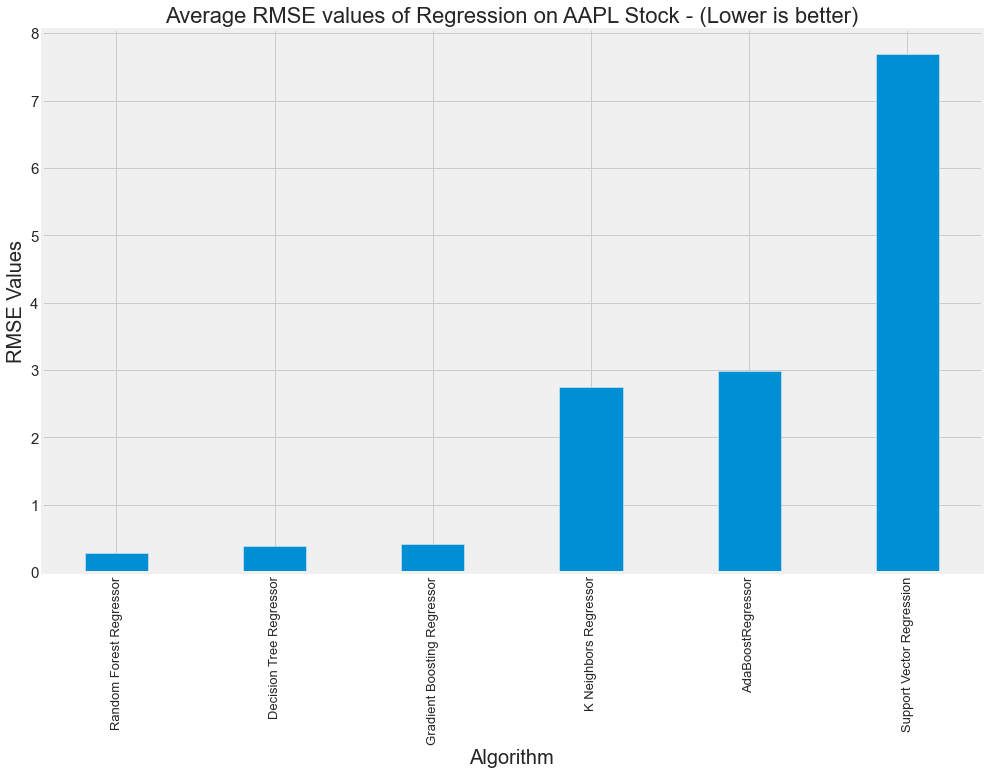

In [55]:
fig = plt.figure(figsize = (15, 10))

# creating the bar plot
plt.bar(avg_rmse_AAPL_algo, avg_rmse_AAPL_values,width = 0.4)
plt.xticks(rotation=90,size=13)
plt.yticks(size=15)
plt.xlabel("Algorithm",size=20)
plt.ylabel("RMSE Values",size=20)
plt.title("Average RMSE values of Regression on AAPL Stock - (Lower is better)",size=22)
plt.show()

In [56]:
sorted(avg_rmse_AAPL_data.items(), key=lambda x: x[1])

[('Random Forest Regressor', 0.279830311976951),
 ('Decision Tree Regressor', 0.3877685529702846),
 ('Gradient Boosting Regressor', 0.41284151222886667),
 ('K Neighbors Regressor', 2.753621791321385),
 ('AdaBoostRegressor', 2.9882606727614274),
 ('Support Vector Regression', 7.68546960999998)]

In [57]:
min(avg_rmse_AAPL_data.items(), key=lambda x: x[1])

('Random Forest Regressor', 0.279830311976951)

In [58]:
print("As we can see from the above results, we can conclude from the Average RMSE Score that")
print ('\033[1m')
print(min(avg_rmse_AAPL_data.items(), key=lambda x: x[1]))
print ('\033[0m')
print("Performs the best out of the Regression Algorithms tested for AAPL Stock")

As we can see from the above results, we can conclude from the Average RMSE Score that

('Random Forest Regressor', 0.279830311976951)

Performs the best out of the Regression Algorithms tested for AAPL Stock


# AMZN

In [59]:
# Prediction of AMZN Stock using regression algorithms

avg_rmse_AMZN = []
avg_mape_AMZN = []
avg_mbe_AMZN = []



for reg in regressors:
    rmse_AMZN = []
    mape_AMZN = []
    mbe_AMZN = []
    
    for i in range(10):
        
        X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2,random_state=(random.randint(0,100)))
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        regressor = reg.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        #RMSE
        rmse_AMZN.append(metrics.mean_squared_error(y_test, y_pred, squared=False))
        
        #MAPE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        mape = 0
        for i in range(len(y_test)):
            mape = mape + abs(( y_test[i]-y_pred[i] ) / y_test[i])
        mape = (1/len(y_test)) * mape * 100
        mape_AMZN.append(mape)
        
        #MBE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        y_test = y_test.reshape(len(y_test),1)
        y_pred = y_pred.reshape(len(y_pred),1)   
        diff1 = (y_test-y_pred)
        mbe_AMZN.append(diff1.mean())


    
    print ('\033[1m')
    print("\n10 Trials: ",reg , "\n")
    print ('\033[0m')
    print("RMSE:\n",rmse_AMZN)
    avg_accuracy = sum(rmse_AMZN)/10
    avg_rmse_AMZN.append(avg_accuracy)
    max_accuracy = max(rmse_AMZN)
    min_accuracy = min(rmse_AMZN)

    print("\nAverage RMSE = ",avg_accuracy)
    print("Max RMSE = ",max_accuracy)
    print("Min RMSE = ",min_accuracy)
    
    # Mean Absolute Perncentage Error
    print("\nMAPE:\n",mape_AMZN)
    avg_mape = sum(mape_AMZN)/10
    avg_mape_AMZN.append(avg_mape)
    max_mape = max(mape_AMZN)
    min_mape = min(mape_AMZN)
    print("\nAverage MAPE = ",avg_mape)
    print("Max MAPE = ",max_mape)
    print("Min MAPE = ",min_mape)
    
    #Mean Bias Error
    print("\nMBE:\n",mbe_AMZN)
    avg_mbe = sum(mbe_AMZN)/10
    avg_mbe_AMZN.append(avg_mbe)
    max_mbe = max(mbe_AMZN)
    min_mbe = min(mbe_AMZN)
    print("\nAverage MBE = ",avg_mbe)
    print("Max MBE = ",max_mbe)
    print("Min MBE = ",min_mbe)



10 Trials:  RandomForestRegressor() 


RMSE:
 [0.23384169962946222, 0.18799679990420637, 0.17407132540911216, 0.1705533834235639, 0.2079718046703298, 0.1871277668965234, 0.22058731183548044, 0.18231095182757004, 0.18701503457001895, 0.2843917499248266]

Average RMSE =  0.2035867828091094
Max RMSE =  0.2843917499248266
Min RMSE =  0.1705533834235639

MAPE:
 [0.14970033138728225, 0.12770880481023217, 0.14162643254050422, 0.13200242128080397, 0.1310225665600551, 0.136200025637262, 0.1481044313698839, 0.1492780785687462, 0.14704412068090963, 0.15800570178489032]

Average MAPE =  0.142069291462057
Max MAPE =  0.15800570178489032
Min MAPE =  0.12770880481023217

MBE:
 [0.0006756862004599836, 0.0007204454285757603, 0.004483082313386288, -0.005241372793439848, -0.004312241758619048, -0.0026750972157431564, 0.008570545306281034, 0.01156327540912282, -0.0024754115513396647, 0.015082132929847307]

Average MBE =  0.0026391044268531476
Max MBE =  0.015082132929847307
Min MBE =  -0.005241372793439

In [60]:
avg_rmse_AMZN

[0.2035867828091094,
 7.37795114871289,
 3.4765932079904287,
 0.2503383666325422,
 0.36020930178207483,
 3.5556360102884015]

In [61]:
for i in avg_rmse_AMZN:
    avg_rmse_AMZN_data = {'Random Forest Regressor':avg_rmse_AMZN[0], 'Support Vector Regression': avg_rmse_AMZN[1],
                         'K Neighbors Regressor': avg_rmse_AMZN[2], 'Decision Tree Regressor': avg_rmse_AMZN[3],
                         'Gradient Boosting Regressor': avg_rmse_AMZN[4], 'AdaBoostRegressor': avg_rmse_AMZN[5]
                        }

In [62]:
avg_rmse_AMZN_data = dict(sorted(avg_rmse_AMZN_data.items(), key=lambda item: item[1]))

In [63]:
avg_rmse_AMZN_algo = list(avg_rmse_AMZN_data.keys())
avg_rmse_AMZN_values = list(avg_rmse_AMZN_data.values())

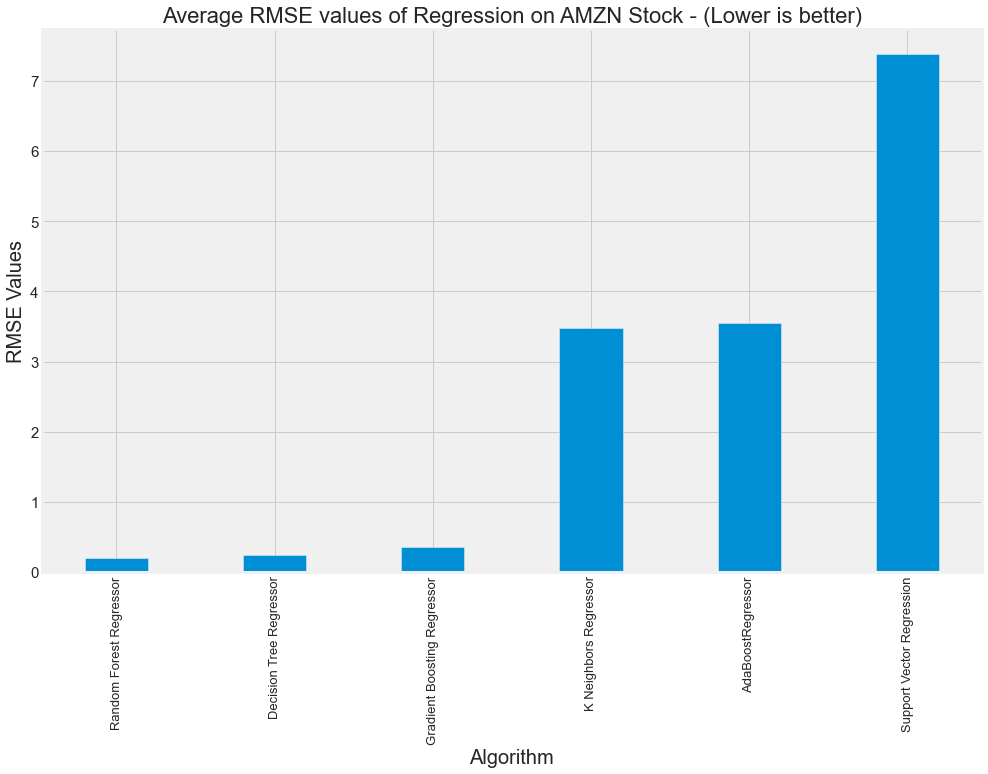

In [64]:
fig = plt.figure(figsize = (15, 10))

# creating the bar plot
plt.bar(avg_rmse_AMZN_algo, avg_rmse_AMZN_values,width = 0.4)
plt.xticks(rotation=90,size=13)
plt.yticks(size=15)
plt.xlabel("Algorithm",size=20)
plt.ylabel("RMSE Values",size=20)
plt.title("Average RMSE values of Regression on AMZN Stock - (Lower is better)",size=22)
plt.show()

In [65]:
sorted(avg_rmse_AMZN_data.items(), key=lambda x: x[1])

[('Random Forest Regressor', 0.2035867828091094),
 ('Decision Tree Regressor', 0.2503383666325422),
 ('Gradient Boosting Regressor', 0.36020930178207483),
 ('K Neighbors Regressor', 3.4765932079904287),
 ('AdaBoostRegressor', 3.5556360102884015),
 ('Support Vector Regression', 7.37795114871289)]

In [66]:
min(avg_rmse_AMZN_data.items(), key=lambda x: x[1])

('Random Forest Regressor', 0.2035867828091094)

In [67]:
print("As we can see from the above results, we can conclude from the Average RMSE Score that")
print ('\033[1m')
print(min(avg_rmse_AMZN_data.items(), key=lambda x: x[1]))
print ('\033[0m')
print("Performs the best out of the Regression Algorithms tested for AMZN Stock")

As we can see from the above results, we can conclude from the Average RMSE Score that

('Random Forest Regressor', 0.2035867828091094)

Performs the best out of the Regression Algorithms tested for AMZN Stock


# GOOG

In [68]:
# Prediction of GOOG Stock using regression algorithms

avg_rmse_GOOG = []
avg_mape_GOOG = []
avg_mbe_GOOG = []



for reg in regressors:
    rmse_GOOG = []
    mape_GOOG = []
    mbe_GOOG = []
    
    for i in range(10):
        
        X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2,random_state=(random.randint(0,100)))
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        regressor = reg.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        #RMSE
        rmse_GOOG.append(metrics.mean_squared_error(y_test, y_pred, squared=False))
        
        #MAPE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        mape = 0
        for i in range(len(y_test)):
            mape = mape + abs(( y_test[i]-y_pred[i] ) / y_test[i])
        mape = (1/len(y_test)) * mape * 100
        mape_GOOG.append(mape)
        
        #MBE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        y_test = y_test.reshape(len(y_test),1)
        y_pred = y_pred.reshape(len(y_pred),1)   
        diff1 = (y_test-y_pred)
        mbe_GOOG.append(diff1.mean())


    
    print ('\033[1m')
    print("\n10 Trials: ",reg , "\n")
    print ('\033[0m')
    print("RMSE:\n",rmse_GOOG)
    avg_accuracy = sum(rmse_GOOG)/10
    avg_rmse_GOOG.append(avg_accuracy)
    max_accuracy = max(rmse_GOOG)
    min_accuracy = min(rmse_GOOG)

    print("\nAverage RMSE = ",avg_accuracy)
    print("Max RMSE = ",max_accuracy)
    print("Min RMSE = ",min_accuracy)
    
    # Mean Absolute Perncentage Error
    print("\nMAPE:\n",mape_GOOG)
    avg_mape = sum(mape_GOOG)/10
    avg_mape_GOOG.append(avg_mape)
    max_mape = max(mape_GOOG)
    min_mape = min(mape_GOOG)
    print("\nAverage MAPE = ",avg_mape)
    print("Max MAPE = ",max_mape)
    print("Min MAPE = ",min_mape)
    
    #Mean Bias Error
    print("\nMBE:\n",mbe_GOOG)
    avg_mbe = sum(mbe_GOOG)/10
    avg_mbe_GOOG.append(avg_mbe)
    max_mbe = max(mbe_GOOG)
    min_mbe = min(mbe_GOOG)
    print("\nAverage MBE = ",avg_mbe)
    print("Max MBE = ",max_mbe)
    print("Min MBE = ",min_mbe)



10 Trials:  RandomForestRegressor() 


RMSE:
 [0.14638994184216447, 0.11854186386414, 0.16184398486771082, 0.18752787170067453, 0.1663021754045545, 0.15021113316044385, 0.1340014576841991, 0.15482640209051304, 0.15806224358244292, 0.18479193618955167]

Average RMSE =  0.1562499010386395
Max RMSE =  0.18752787170067453
Min RMSE =  0.11854186386414

MAPE:
 [0.1143771343707019, 0.12232934659021401, 0.1183612951492631, 0.11562367868055708, 0.11164910277709104, 0.12490743088896736, 0.11529749156373903, 0.11493721295455057, 0.11271076872752073, 0.13266960614736187]

Average MAPE =  0.11828630678499666
Max MAPE =  0.13266960614736187
Min MAPE =  0.11164910277709104

MBE:
 [-0.0021562118189677, 0.0048098465185316495, -0.0025034876475257704, -0.002783151486563527, 0.0007661684354148982, 0.012227280688664261, -0.001840866293225888, 0.007099564359301635, -0.008458902022195236, -0.005281290875540863]

Average MBE =  0.0001878949857893459
Max MBE =  0.012227280688664261
Min MBE =  -0.008458902022

In [69]:
avg_rmse_GOOG

[0.1562499010386395,
 6.182753784370269,
 2.1543274891747073,
 0.2149682556609099,
 0.27508177302073045,
 2.725126531248155]

In [70]:
for i in avg_rmse_GOOG:
    avg_rmse_GOOG_data = {'Random Forest Regressor':avg_rmse_GOOG[0], 'Support Vector Regression': avg_rmse_GOOG[1],
                         'K Neighbors Regressor': avg_rmse_GOOG[2], 'Decision Tree Regressor': avg_rmse_GOOG[3],
                         'Gradient Boosting Regressor': avg_rmse_GOOG[4], 'AdaBoostRegressor': avg_rmse_GOOG[5]
                        }

In [71]:
avg_rmse_GOOG_data = dict(sorted(avg_rmse_GOOG_data.items(), key=lambda item: item[1]))

In [72]:
avg_rmse_GOOG_algo = list(avg_rmse_GOOG_data.keys())
avg_rmse_GOOG_values = list(avg_rmse_GOOG_data.values())

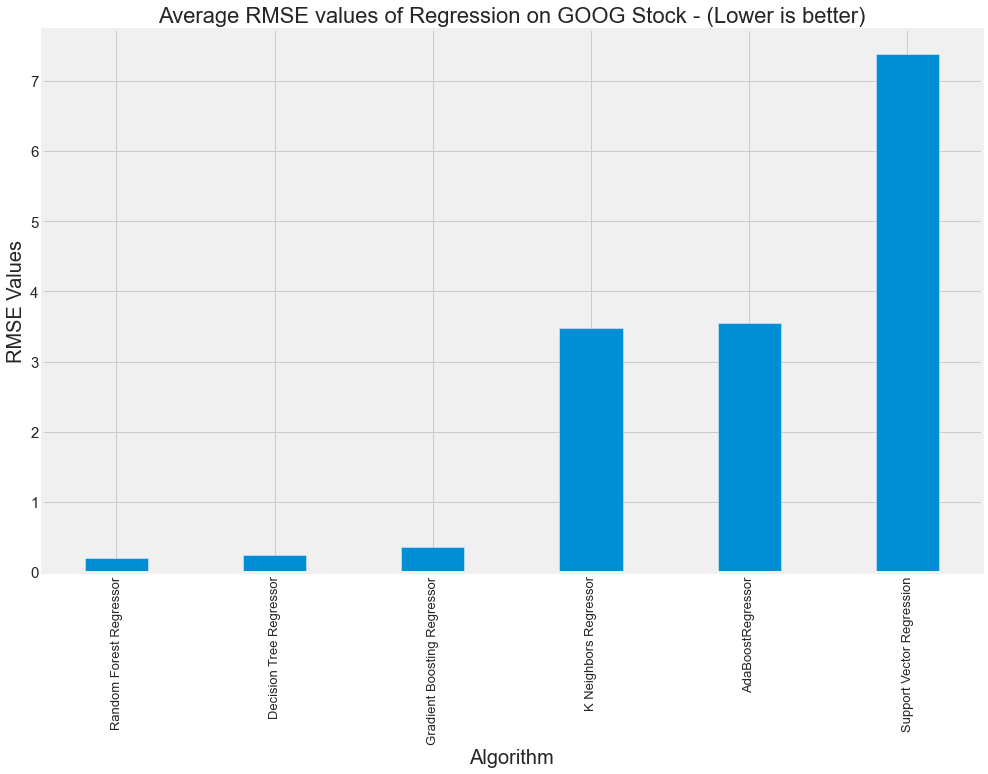

In [73]:
fig = plt.figure(figsize = (15, 10))

# creating the bar plot
plt.bar(avg_rmse_GOOG_algo, avg_rmse_AMZN_values,width = 0.4)
plt.xticks(rotation=90,size=13)
plt.yticks(size=15)
plt.xlabel("Algorithm",size=20)
plt.ylabel("RMSE Values",size=20)
plt.title("Average RMSE values of Regression on GOOG Stock - (Lower is better)",size=22)
plt.show()

In [74]:
sorted(avg_rmse_GOOG_data.items(), key=lambda x: x[1])

[('Random Forest Regressor', 0.1562499010386395),
 ('Decision Tree Regressor', 0.2149682556609099),
 ('Gradient Boosting Regressor', 0.27508177302073045),
 ('K Neighbors Regressor', 2.1543274891747073),
 ('AdaBoostRegressor', 2.725126531248155),
 ('Support Vector Regression', 6.182753784370269)]

In [75]:
min(avg_rmse_GOOG_data.items(), key=lambda x: x[1])

('Random Forest Regressor', 0.1562499010386395)

In [76]:
print("As we can see from the above results, we can conclude from the Average RMSE Score that")
print ('\033[1m')
print(min(avg_rmse_GOOG_data.items(), key=lambda x: x[1]))
print ('\033[0m')
print("Performs the best out of the Regression Algorithms tested for GOOG Stock")

As we can see from the above results, we can conclude from the Average RMSE Score that

('Random Forest Regressor', 0.1562499010386395)

Performs the best out of the Regression Algorithms tested for GOOG Stock


# META

In [77]:
# Prediction of AAPL Stock using regression algorithms

avg_rmse_META = []
avg_mape_META = []
avg_mbe_META = []



for reg in regressors:
    rmse_META = []
    mape_META = []
    mbe_META = []
    
    for i in range(10):
        
        X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2,random_state=(random.randint(0,100)))
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        regressor = reg.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        #RMSE
        rmse_META.append(metrics.mean_squared_error(y_test, y_pred, squared=False))
        
        #MAPE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        mape = 0
        for i in range(len(y_test)):
            mape = mape + abs(( y_test[i]-y_pred[i] ) / y_test[i])
        mape = (1/len(y_test)) * mape * 100
        mape_META.append(mape)
        
        #MBE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        y_test = y_test.reshape(len(y_test),1)
        y_pred = y_pred.reshape(len(y_pred),1)   
        diff1 = (y_test-y_pred)
        mbe_META.append(diff1.mean())


    
    print ('\033[1m')
    print("\n10 Trials: ",reg , "\n")
    print ('\033[0m')
    print("RMSE:\n",rmse_META)
    avg_accuracy = sum(rmse_META)/10
    avg_rmse_META.append(avg_accuracy)
    max_accuracy = max(rmse_META)
    min_accuracy = min(rmse_META)

    print("\nAverage RMSE = ",avg_accuracy)
    print("Max RMSE = ",max_accuracy)
    print("Min RMSE = ",min_accuracy)
    
    # Mean Absolute Perncentage Error
    print("\nMAPE:\n",mape_META)
    avg_mape = sum(mape_META)/10
    avg_mape_META.append(avg_mape)
    max_mape = max(mape_META)
    min_mape = min(mape_META)
    print("\nAverage MAPE = ",avg_mape)
    print("Max MAPE = ",max_mape)
    print("Min MAPE = ",min_mape)
    
    #Mean Bias Error
    print("\nMBE:\n",mbe_META)
    avg_mbe = sum(mbe_META)/10
    avg_mbe_META.append(avg_mbe)
    max_mbe = max(mbe_META)
    min_mbe = min(mbe_META)
    print("\nAverage MBE = ",avg_mbe)
    print("Max MBE = ",max_mbe)
    print("Min MBE = ",min_mbe)



10 Trials:  RandomForestRegressor() 


RMSE:
 [0.37990241216430226, 0.4413189019539981, 0.35771011535091457, 0.4591261053229968, 0.2725543489819693, 0.3379170384504837, 0.3616714303989593, 0.3539299437091634, 0.4291346191420706, 0.4460789187283209]

Average RMSE =  0.3839343834203179
Max RMSE =  0.4591261053229968
Min RMSE =  0.2725543489819693

MAPE:
 [0.17780489468368219, 0.16873043026823123, 0.14196272738097493, 0.17636296470845372, 0.14183892907513695, 0.14918221622437292, 0.1607665390357054, 0.1629871643357782, 0.16125043385782228, 0.14741307721494698]

Average MAPE =  0.15882993767851045
Max MAPE =  0.17780489468368219
Min MAPE =  0.14183892907513695

MBE:
 [-0.008366099009437978, 0.007985328719729444, 0.0004693709100995229, -0.016464107717786492, -0.01945515560725359, 0.0010922830445424191, -0.006690895481715006, 0.002802021352071553, 0.0007391213235395175, 0.029616335800715467]

Average MBE =  -0.0008271796665495137
Max MBE =  0.029616335800715467
Min MBE =  -0.01945515560725

In [78]:
avg_rmse_META

[0.3839343834203179,
 24.351137904642734,
 7.060198377881524,
 0.5656212137683461,
 0.771350373303488,
 5.342783377184093]

In [79]:
for i in avg_rmse_META:
    avg_rmse_META_data = {'Random Forest Regressor':avg_rmse_META[0], 'Support Vector Regression': avg_rmse_META[1],
                         'K Neighbors Regressor': avg_rmse_META[2], 'Decision Tree Regressor': avg_rmse_META[3],
                         'Gradient Boosting Regressor': avg_rmse_META[4], 'AdaBoostRegressor': avg_rmse_META[5]
                        }

In [80]:
avg_rmse_META_data = dict(sorted(avg_rmse_META_data.items(), key=lambda item: item[1]))

In [81]:
avg_rmse_META_algo = list(avg_rmse_META_data.keys())
avg_rmse_META_values = list(avg_rmse_META_data.values())

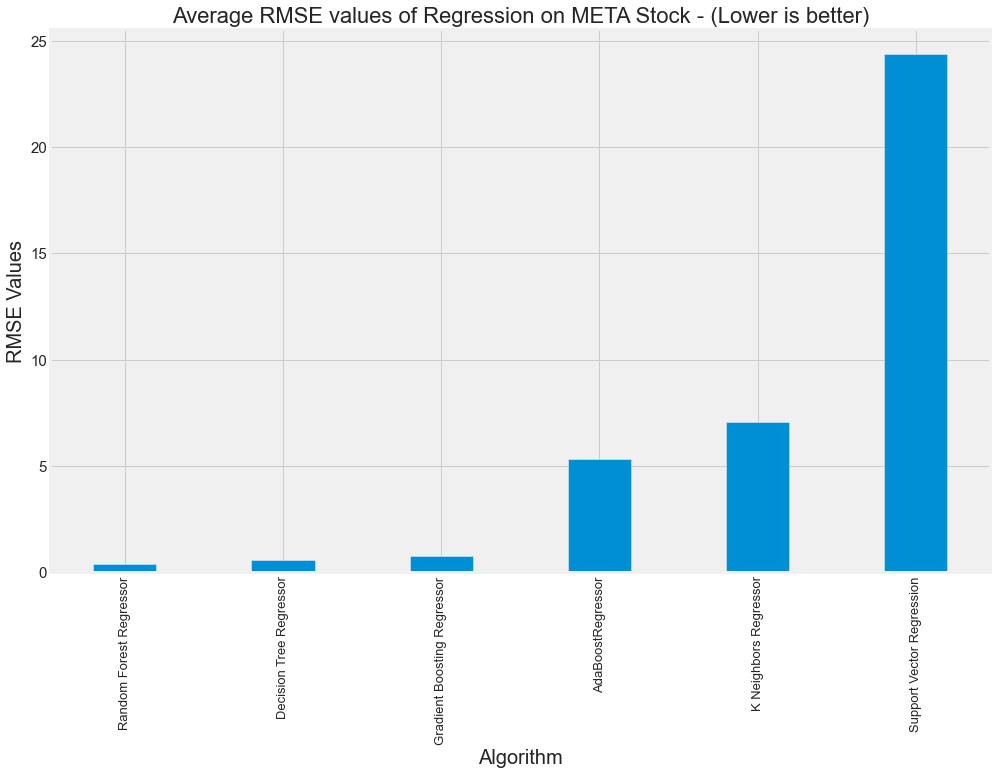

In [82]:
fig = plt.figure(figsize = (15, 10))

# creating the bar plot
plt.bar(avg_rmse_META_algo, avg_rmse_META_values,width = 0.4)
plt.xticks(rotation=90,size=13)
plt.yticks(size=15)
plt.xlabel("Algorithm",size=20)
plt.ylabel("RMSE Values",size=20)
plt.title("Average RMSE values of Regression on META Stock - (Lower is better)",size=22)
plt.show()

In [83]:
sorted(avg_rmse_META_data.items(), key=lambda x: x[1])

[('Random Forest Regressor', 0.3839343834203179),
 ('Decision Tree Regressor', 0.5656212137683461),
 ('Gradient Boosting Regressor', 0.771350373303488),
 ('AdaBoostRegressor', 5.342783377184093),
 ('K Neighbors Regressor', 7.060198377881524),
 ('Support Vector Regression', 24.351137904642734)]

In [84]:
min(avg_rmse_META_data.items(), key=lambda x: x[1])

('Random Forest Regressor', 0.3839343834203179)

In [85]:
print("As we can see from the above results, we can conclude from the Average RMSE Score that")
print ('\033[1m')
print(min(avg_rmse_META_data.items(), key=lambda x: x[1]))
print ('\033[0m')
print("Performs the best out of the Regression Algorithms tested for META Stock")

As we can see from the above results, we can conclude from the Average RMSE Score that

('Random Forest Regressor', 0.3839343834203179)

Performs the best out of the Regression Algorithms tested for META Stock


# MSFT

In [86]:
# Prediction of MSFT Stock using regression algorithms

avg_rmse_MSFT = []
avg_mape_MSFT = []
avg_mbe_MSFT = []



for reg in regressors:
    rmse_MSFT = []
    mape_MSFT = []
    mbe_MSFT = []
    
    for i in range(10):
        
        X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.2,random_state=(random.randint(0,100)))
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        regressor = reg.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        #RMSE
        rmse_MSFT.append(metrics.mean_squared_error(y_test, y_pred, squared=False))
        
        #MAPE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        mape = 0
        for i in range(len(y_test)):
            mape = mape + abs(( y_test[i]-y_pred[i] ) / y_test[i])
        mape = (1/len(y_test)) * mape * 100
        mape_MSFT.append(mape)
        
        #MBE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        y_test = y_test.reshape(len(y_test),1)
        y_pred = y_pred.reshape(len(y_pred),1)   
        diff1 = (y_test-y_pred)
        mbe_MSFT.append(diff1.mean())


    
    print ('\033[1m')
    print("\n10 Trials: ",reg , "\n")
    print ('\033[0m')
    print("RMSE:\n",rmse_MSFT)
    avg_accuracy = sum(rmse_MSFT)/10
    avg_rmse_MSFT.append(avg_accuracy)
    max_accuracy = max(rmse_MSFT)
    min_accuracy = min(rmse_MSFT)

    print("\nAverage RMSE = ",avg_accuracy)
    print("Max RMSE = ",max_accuracy)
    print("Min RMSE = ",min_accuracy)
    
    # Mean Absolute Perncentage Error
    print("\nMAPE:\n",mape_MSFT)
    avg_mape = sum(mape_MSFT)/10
    avg_mape_MSFT.append(avg_mape)
    max_mape = max(mape_MSFT)
    min_mape = min(mape_MSFT)
    print("\nAverage MAPE = ",avg_mape)
    print("Max MAPE = ",max_mape)
    print("Min MAPE = ",min_mape)
    
    #Mean Bias Error
    print("\nMBE:\n",mbe_MSFT)
    avg_mbe = sum(mbe_MSFT)/10
    avg_mbe_MSFT.append(avg_mbe)
    max_mbe = max(mbe_MSFT)
    min_mbe = min(mbe_MSFT)
    print("\nAverage MBE = ",avg_mbe)
    print("Max MBE = ",max_mbe)
    print("Min MBE = ",min_mbe)



10 Trials:  RandomForestRegressor() 


RMSE:
 [0.4555720413769921, 0.4502131433368023, 0.49756801850486027, 0.5027736821731847, 0.5295667337020241, 0.5418549767049371, 0.4655291721759335, 0.49316353278482605, 0.5255653429655844, 0.43249550494242855]

Average RMSE =  0.4894302148667573
Max RMSE =  0.5418549767049371
Min RMSE =  0.43249550494242855

MAPE:
 [0.269340410184531, 0.2741208698148318, 0.2799822810893256, 0.2876679132649304, 0.2993218456536466, 0.2898837423938778, 0.2667276734084017, 0.295735960362959, 0.28732697568289356, 0.26289870115158576]

Average MAPE =  0.2813006373006983
Max MAPE =  0.2993218456536466
Min MAPE =  0.26289870115158576

MBE:
 [0.002948364227537351, -0.02914116957831058, 0.003789444764455392, 0.02029748553321431, 0.012821008137293931, 0.011411413238161664, -0.025291501491789076, 0.02036521586160835, 0.012890896721491853, 0.006773034466637525]

Average MBE =  0.003686419188030072
Max MBE =  0.02036521586160835
Min MBE =  -0.02914116957831058


10 Trials:  

In [87]:
avg_rmse_MSFT

[0.4894302148667573,
 21.091374031090062,
 5.350988400405411,
 0.6936199782969403,
 0.7701648115313902,
 5.310823415017142]

In [88]:
for i in avg_rmse_MSFT:
    avg_rmse_MSFT_data = {'Random Forest Regressor':avg_rmse_MSFT[0], 'Support Vector Regression': avg_rmse_MSFT[1],
                         'K Neighbors Regressor': avg_rmse_MSFT[2], 'Decision Tree Regressor': avg_rmse_MSFT[3],
                         'Gradient Boosting Regressor': avg_rmse_MSFT[4], 'AdaBoostRegressor': avg_rmse_MSFT[5]
                        }

In [89]:
avg_rmse_MSFT_data = dict(sorted(avg_rmse_MSFT_data.items(), key=lambda item: item[1]))

In [90]:
avg_rmse_MSFT_algo = list(avg_rmse_MSFT_data.keys())
avg_rmse_MSFT_values = list(avg_rmse_MSFT_data.values())

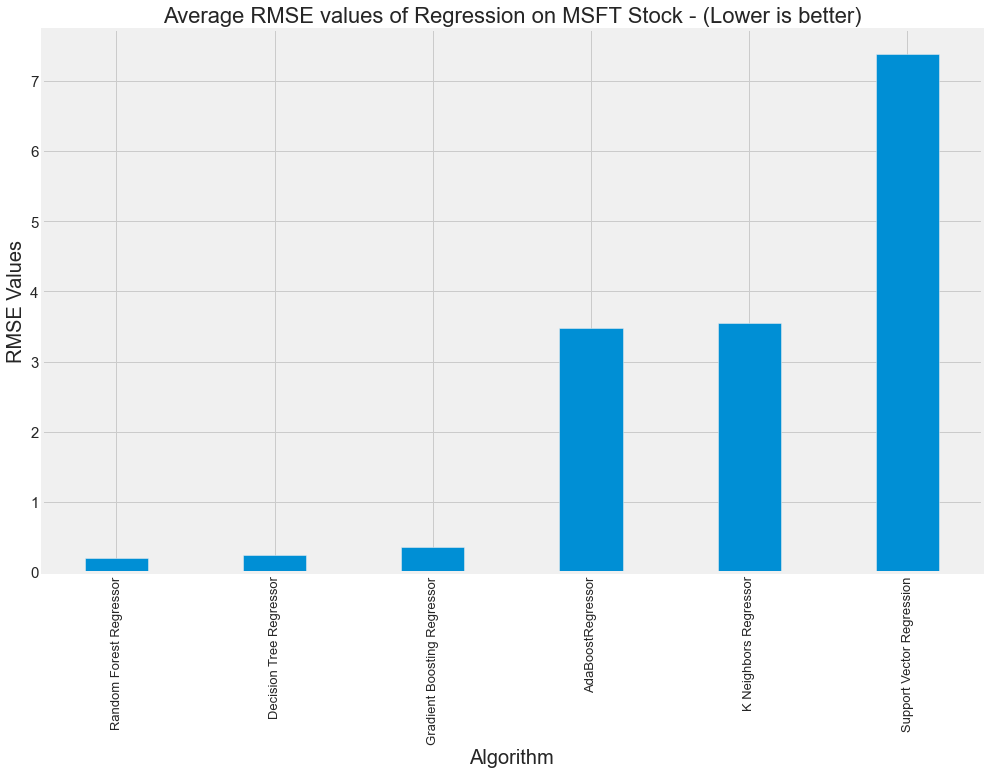

In [91]:
fig = plt.figure(figsize = (15, 10))

# creating the bar plot
plt.bar(avg_rmse_MSFT_algo, avg_rmse_AMZN_values,width = 0.4)
plt.xticks(rotation=90,size=13)
plt.yticks(size=15)
plt.xlabel("Algorithm",size=20)
plt.ylabel("RMSE Values",size=20)
plt.title("Average RMSE values of Regression on MSFT Stock - (Lower is better)",size=22)
plt.show()

In [92]:
sorted(avg_rmse_MSFT_data.items(), key=lambda x: x[1])

[('Random Forest Regressor', 0.4894302148667573),
 ('Decision Tree Regressor', 0.6936199782969403),
 ('Gradient Boosting Regressor', 0.7701648115313902),
 ('AdaBoostRegressor', 5.310823415017142),
 ('K Neighbors Regressor', 5.350988400405411),
 ('Support Vector Regression', 21.091374031090062)]

In [93]:
min(avg_rmse_MSFT_data.items(), key=lambda x: x[1])

('Random Forest Regressor', 0.4894302148667573)

In [94]:
print("As we can see from the above results, we can conclude from the Average RMSE Score that")
print ('\033[1m')
print(min(avg_rmse_MSFT_data.items(), key=lambda x: x[1]))
print ('\033[0m')
print("Performs the best out of the Regression Algorithms tested for MSFT Stock")

As we can see from the above results, we can conclude from the Average RMSE Score that

('Random Forest Regressor', 0.4894302148667573)

Performs the best out of the Regression Algorithms tested for MSFT Stock


# NFLX

In [95]:
# Prediction of NFLX Stock using regression algorithms

avg_rmse_NFLX = []
avg_mape_NFLX = []
avg_mbe_NFLX = []



for reg in regressors:
    rmse_NFLX = []
    mape_NFLX = []
    mbe_NFLX = []
    
    for i in range(10):
        
        X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.2,random_state=(random.randint(0,100)))
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        regressor = reg.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        #RMSE
        rmse_NFLX.append(metrics.mean_squared_error(y_test, y_pred, squared=False))
        
        #MAPE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        mape = 0
        for i in range(len(y_test)):
            mape = mape + abs(( y_test[i]-y_pred[i] ) / y_test[i])
        mape = (1/len(y_test)) * mape * 100
        mape_NFLX.append(mape)
        
        #MBE
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        y_test = y_test.reshape(len(y_test),1)
        y_pred = y_pred.reshape(len(y_pred),1)   
        diff1 = (y_test-y_pred)
        mbe_NFLX.append(diff1.mean())


    
    print ('\033[1m')
    print("\n10 Trials: ",reg , "\n")
    print ('\033[0m')
    print("RMSE:\n",rmse_NFLX)
    avg_accuracy = sum(rmse_NFLX)/10
    avg_rmse_NFLX.append(avg_accuracy)
    max_accuracy = max(rmse_NFLX)
    min_accuracy = min(rmse_NFLX)

    print("\nAverage RMSE = ",avg_accuracy)
    print("Max RMSE = ",max_accuracy)
    print("Min RMSE = ",min_accuracy)
    
    # Mean Absolute Perncentage Error
    print("\nMAPE:\n",mape_NFLX)
    avg_mape = sum(mape_NFLX)/10
    avg_mape_NFLX.append(avg_mape)
    max_mape = max(mape_NFLX)
    min_mape = min(mape_NFLX)
    print("\nAverage MAPE = ",avg_mape)
    print("Max MAPE = ",max_mape)
    print("Min MAPE = ",min_mape)
    
    #Mean Bias Error
    print("\nMBE:\n",mbe_NFLX)
    avg_mbe = sum(mbe_NFLX)/10
    avg_mbe_NFLX.append(avg_mbe)
    max_mbe = max(mbe_NFLX)
    min_mbe = min(mbe_NFLX)
    print("\nAverage MBE = ",avg_mbe)
    print("Max MBE = ",max_mbe)
    print("Min MBE = ",min_mbe)



10 Trials:  RandomForestRegressor() 


RMSE:
 [0.9195177308164252, 0.8230239132014637, 1.055149439222231, 0.8482676492922857, 0.8164628460367509, 0.7273753579433359, 0.97081428481865, 0.7323556563732851, 0.6675284536983997, 0.6738811431001007]

Average RMSE =  0.8234376474502929
Max RMSE =  1.055149439222231
Min RMSE =  0.6675284536983997

MAPE:
 [0.2123322008392287, 0.22758911058506692, 0.216838822780684, 0.2304006390517319, 0.1886278130685571, 0.2073819963595987, 0.23584096860943632, 0.21140819158915614, 0.20316897744814813, 0.2176867704817208]

Average MAPE =  0.21512754908133286
Max MAPE =  0.23584096860943632
Min MAPE =  0.1886278130685571

MBE:
 [0.020002098055113143, -0.11116647461104069, 0.09204662638051109, 0.034553319111702764, 0.026977453941390925, -0.024517601548680504, 0.08907940620467747, -0.022094899094294445, 0.016953171245635446, 0.01541652519551494]

Average MBE =  0.013724962488053013
Max MBE =  0.09204662638051109
Min MBE =  -0.11116647461104069


10 Trials:  SVR(

In [96]:
avg_rmse_NFLX

[0.8234376474502929,
 51.19987492595998,
 11.997135917195799,
 1.103656826846176,
 1.4469392775762047,
 11.74767346321191]

In [97]:
for i in avg_rmse_NFLX:
    avg_rmse_NFLX_data = {'Random Forest Regressor':avg_rmse_NFLX[0], 'Support Vector Regression': avg_rmse_NFLX[1],
                         'K Neighbors Regressor': avg_rmse_NFLX[2], 'Decision Tree Regressor': avg_rmse_NFLX[3],
                         'Gradient Boosting Regressor': avg_rmse_NFLX[4], 'AdaBoostRegressor': avg_rmse_NFLX[5]
                        }

In [98]:
avg_rmse_NFLX_data = dict(sorted(avg_rmse_NFLX_data.items(), key=lambda item: item[1]))

In [99]:
avg_rmse_NFLX_algo = list(avg_rmse_NFLX_data.keys())
avg_rmse_NFLX_values = list(avg_rmse_NFLX_data.values())

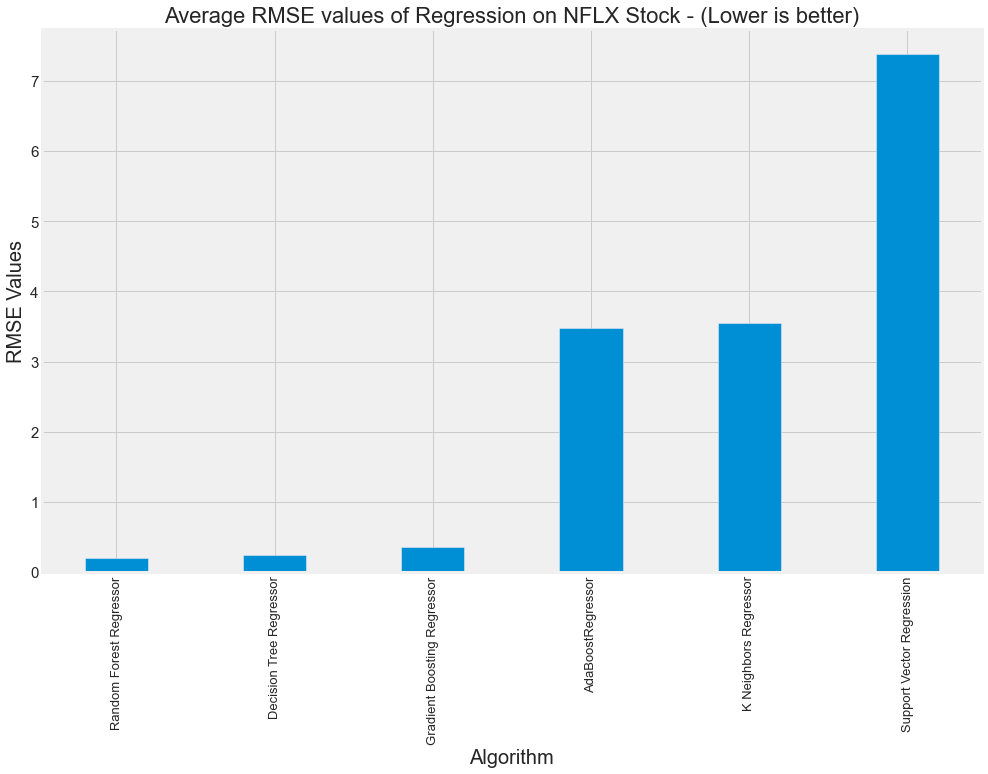

In [100]:
fig = plt.figure(figsize = (15, 10))

# creating the bar plot
plt.bar(avg_rmse_NFLX_algo, avg_rmse_AMZN_values,width = 0.4)
plt.xticks(rotation=90,size=13)
plt.yticks(size=15)
plt.xlabel("Algorithm",size=20)
plt.ylabel("RMSE Values",size=20)
plt.title("Average RMSE values of Regression on NFLX Stock - (Lower is better)",size=22)
plt.show()

In [101]:
sorted(avg_rmse_NFLX_data.items(), key=lambda x: x[1])

[('Random Forest Regressor', 0.8234376474502929),
 ('Decision Tree Regressor', 1.103656826846176),
 ('Gradient Boosting Regressor', 1.4469392775762047),
 ('AdaBoostRegressor', 11.74767346321191),
 ('K Neighbors Regressor', 11.997135917195799),
 ('Support Vector Regression', 51.19987492595998)]

In [102]:
min(avg_rmse_NFLX_data.items(), key=lambda x: x[1])

('Random Forest Regressor', 0.8234376474502929)

In [103]:
print("As we can see from the above results, we can conclude from the Average RMSE Score that")
print ('\033[1m')
print(min(avg_rmse_NFLX_data.items(), key=lambda x: x[1]))
print ('\033[0m')
print("Performs the best out of the Regression Algorithms tested for NFLX Stock")

As we can see from the above results, we can conclude from the Average RMSE Score that

('Random Forest Regressor', 0.8234376474502929)

Performs the best out of the Regression Algorithms tested for NFLX Stock


# <center> **END OF PROJECT**
## <center> **Thank You!**